
# **Trabajo Práctico 1 : Reservas de Hotel**
### *Checkpoint 1*
###Grupo 22: JARVIS
+ 107666	CELANO MINIG, NICOLÁS FRANCO
+ 108642	RANDO, JULIAN AGUSTIN
+ 106421	GOMEZ, ALEJO




## Análisis Inicial

Importamos las bibliotecas a utilizar a lo largo de nuestro trabajo e importamos el dataset a usar

In [301]:
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

colors = sns.color_palette(n_colors=15)

hotels_test_url = 'https://raw.githubusercontent.com/agomezalejo/7506R-1C2023-GRUPO22/main/hotels_train.csv'
df_original = pd.read_csv(hotels_test_url)
df_hotel = df_original.copy()

Luego del cambio en el dataset, esta variable no aporta nada, ya que estaba totalmente relacionada con 'status_date'.

In [302]:
df_hotel = df_hotel.drop('reservation_status_date', axis=1)

Realizamos un primer acercamiento a los datos del dataset.

En principio se observa la cantidad de observaciones y variables:


In [303]:
shape = df_hotel.shape
print("Filas: %d Columnas: %d" % (shape[0], shape[1]))

Filas: 61913 Columnas: 31


Vemos la cabecera del dataframe para conocer más los datos.

In [304]:
df_hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


## Tipos de Variable

Luego de analizar las variables, las categorizamos.

 | Categórico o Cualitativo  | Cuasicuantitativas u ordinales | Cuantitativas discretas | Cuantitativas continuas |
 | ------------- | ------------- | ------------- | ------------- |
 |hotel|id|lead_time|adr
 |arrival_date_month|arrival_date_week_number|arrival_date_year|
 |meal|arrival_date_day_of_month|stays_in_weekend_nights|
 |country||stays_in_week_nights|
 |market_segment||adults|
 |distribution_channel||children|
 |is_repeated_guest||babies|
 |reserved_room_type||previous_cancellations|
 |assigned_room_type||previous_bookings_not_canceled|
 |deposit_type||days_in_waiting_list|
 |agent||required_car_parking_spaces|
 |company||total_of_special_requests|
 |customer_type|||
 |is_canceled|||

## Cálculo de las medidas de resumen de las variables cuantitativas 

Realizamos una lista con todas las variables cuantitativas.

In [305]:
variables_cuantitativas = ['lead_time', 'arrival_date_year', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests']

Calculamos la media, mediana, promedio, moda, etc...

In [306]:
df_hotel_describe = df_hotel[variables_cuantitativas].describe().drop('count', axis=0).transpose()
df_hotel_moda = df_hotel[variables_cuantitativas].mode().transpose()
df_hotel_media = df_hotel[variables_cuantitativas].median().transpose()
df_hotel_describe.assign(mode=df_hotel_moda, median=df_hotel_media)

,mean,std,min,25%,50%,75%,max,mode,median
lead_time,112.248187,110.717953,0.0,23.0,78.0,172.0,629.0,0.0,78.0
arrival_date_year,2016.154749,0.708389,2015.0,2016.0,2016.0,2017.0,2017.0,2016.0,2016.0
arrival_date_day_of_month,15.785812,8.795489,1.0,8.0,16.0,23.0,31.0,17.0,16.0
stays_in_weekend_nights,0.924135,0.993101,0.0,0.0,1.0,2.0,16.0,0.0,1.0
stays_in_week_nights,2.510054,1.884926,0.0,1.0,2.0,3.0,40.0,2.0,2.0
adults,1.862791,0.589066,0.0,2.0,2.0,2.0,55.0,2.0,2.0
children,0.104896,0.402847,0.0,0.0,0.0,0.0,10.0,0.0,0.0
babies,0.007155,0.092158,0.0,0.0,0.0,0.0,9.0,0.0,0.0
previous_cancellations,0.114790,0.993723,0.0,0.0,0.0,0.0,26.0,0.0,0.0
previous_bookings_not_canceled,0.115420,1.396359,0.0,0.0,0.0,0.0,70.0,0.0,0.0


## Análisis de las variables categóricas

### Valores posibles de las variables categóricas

 | Variable  | Valores Posibles | 
 | ------------- | ------------- |
 |hotel|Resort Hotel y City Hotel|
 |arrival_date_month|Enero a Diciembre|
 |meal|Undefined/SC (No meal package)
 ||BB (Bed & Breakfast)
 ||HB (Half Board)
 ||FB (Full Board)|
 |country|Código de País ISO 3166-3:2013 o NULL|
 |market_segment|TA (Travel Agents) o TO (Tour Operators)|
 |distribution_channel|TA (Travel Agents) o TO (Tour Operators)|
 |is_repeated_guest|1 si el huésped es repetido, 0 en caso contrario|
 |reserved_room_type|Letra de la A a la H**(?)**|
 |assigned_room_type|Letra de la A a la H**(?)**|
 |deposit_type|Non-Refund o Refundable|
 |**agent**|ID del agente o NULL|
 |**company**|ID de la empresa o NULL|
 |customer_type|Contract, Group, Transient o Transient-Party|
 |is_repeated_guest|1 si el huésped cancela, 0 si no lo hace|
 

Cambiamos los valores nulos de agente y compañía, ya que ser nulos es una categoría, y para mayor claridad en el analisis, elegimos que sea representado con un nombre de categoría, que serán respectivametne 'not agent' y 'not company'. Además casteamos los valores a strings para mayor comodidad a la hora de realizar gráficos.

In [307]:
df_hotel['company'] = df_hotel['company'].fillna('not company')
df_hotel['company'] = df_hotel['company'].astype(str)

df_hotel['agent'] = df_hotel['agent'].fillna('not agent')
df_hotel['agent'] = df_hotel['agent'].astype(str)

Cambiamos los valores 0 y 1 de 'is_repeated_guest' y de 'is_canceled' por 'Verdadero' y 'Falso' para mayor claridad

In [308]:
df_hotel['is_repeated_guest'] = df_hotel['is_repeated_guest'].apply(lambda x: "True" if x == 1 else "False")
df_hotel['is_canceled'] = df_hotel['is_canceled'].apply(lambda x: "True" if x == 1 else "False")

Realizamos una lista con todas las variables cualitativas

In [309]:
variables_cualitativas = ['hotel','distribution_channel','reserved_room_type',
                          'assigned_room_type', 'deposit_type','customer_type',
                          'meal', 'arrival_date_month', 'market_segment', 'country',
                          'agent', 'company', 'is_repeated_guest', 'is_canceled']

### Frecuencia de los valores tomados por las variables categóricas

Realizamos un grafico de barras para observar la frecuencia de las variables cualitativas. Además en los casos en donde tome más de 18 valores distintos, mostramos los primeros 18 y el restante los vemos unidos en el valor 'resto'. 

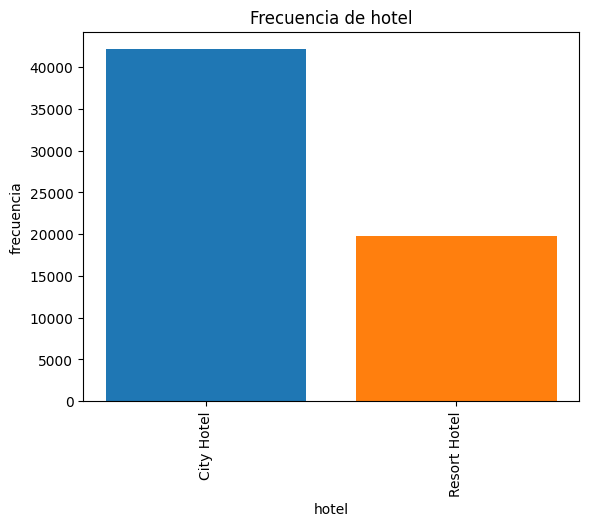

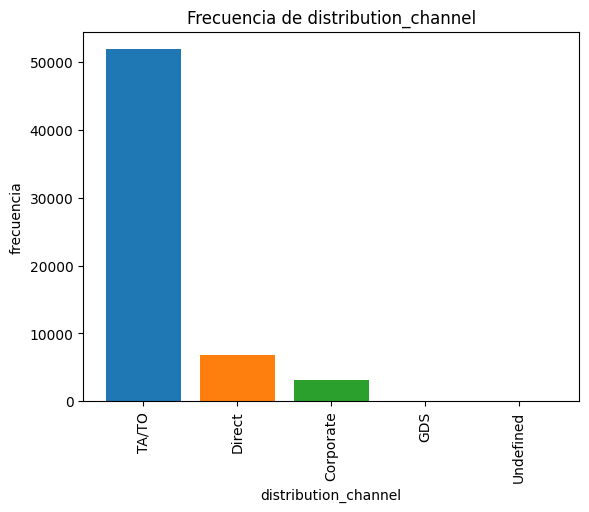

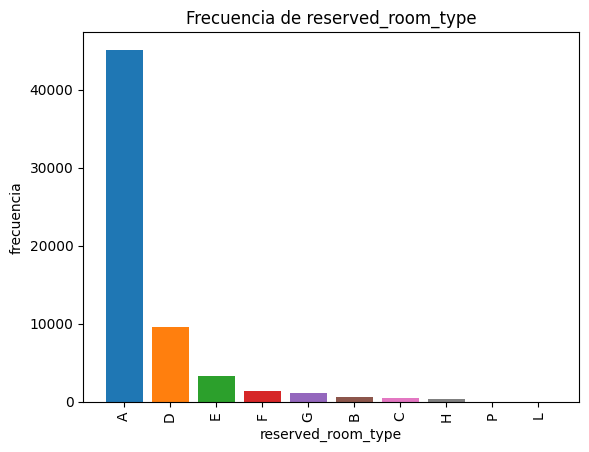

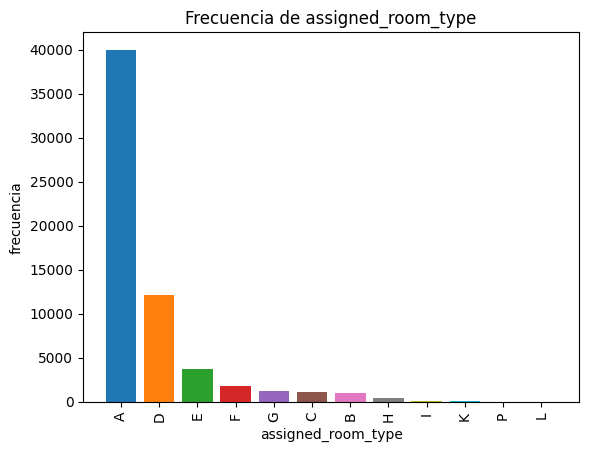

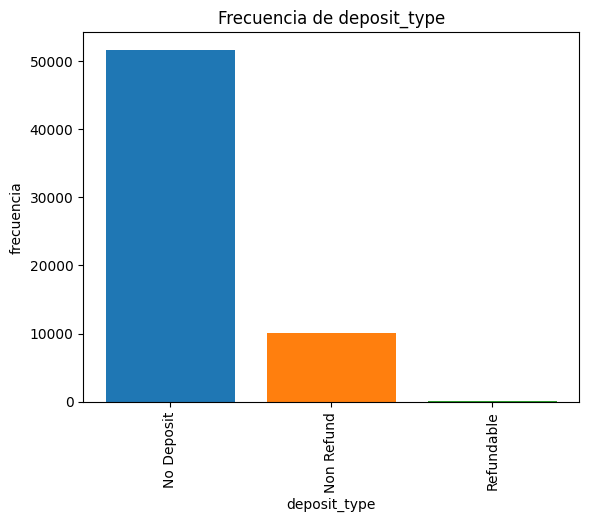

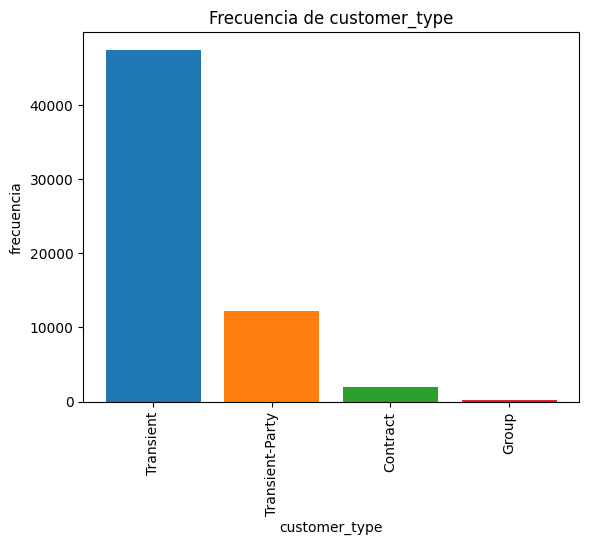

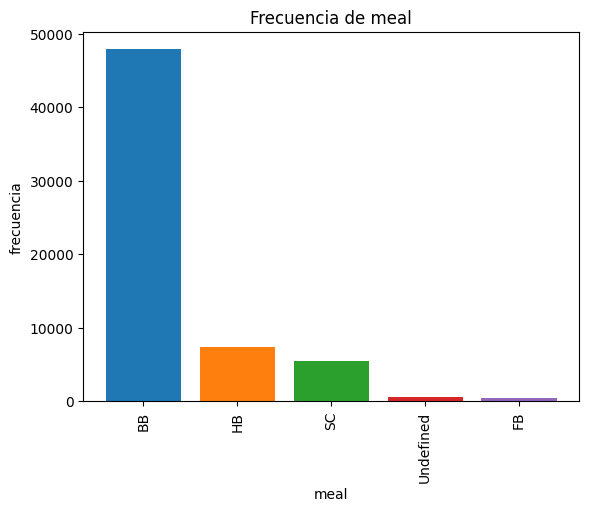

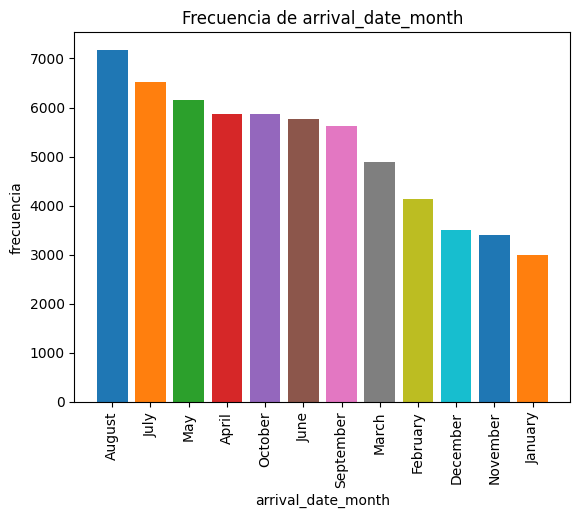

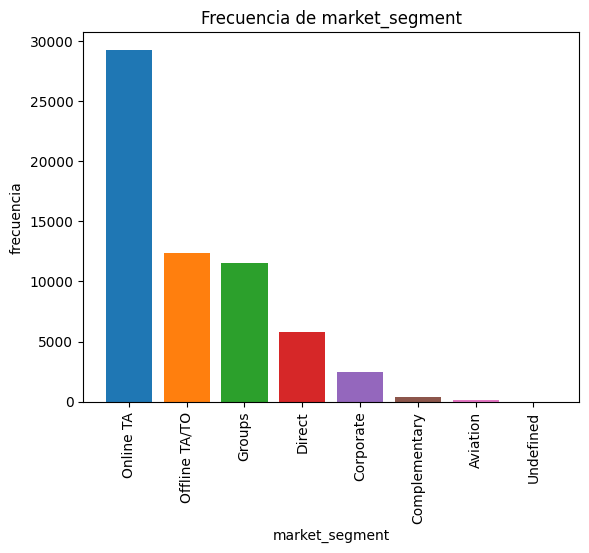

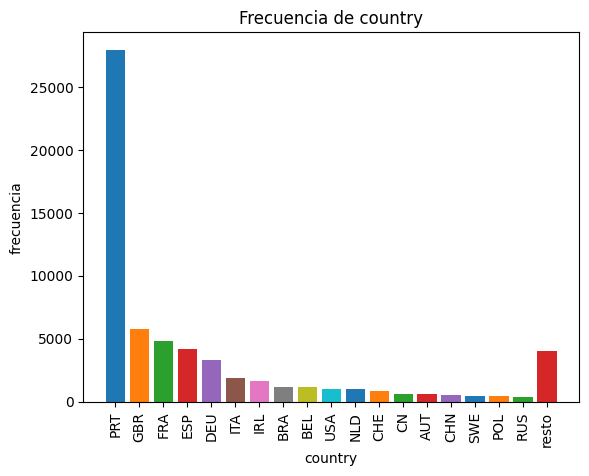

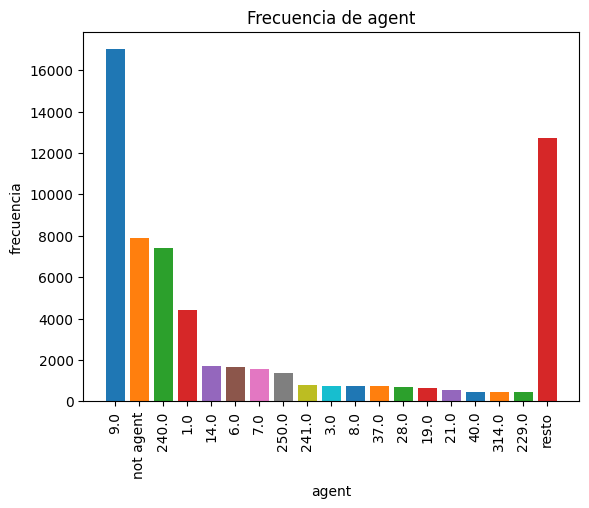

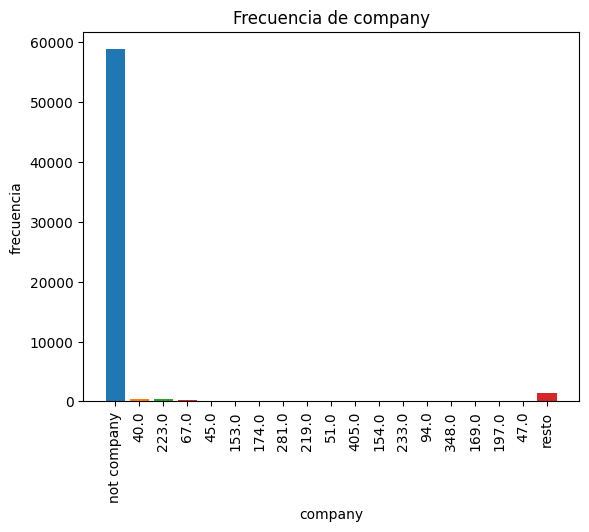

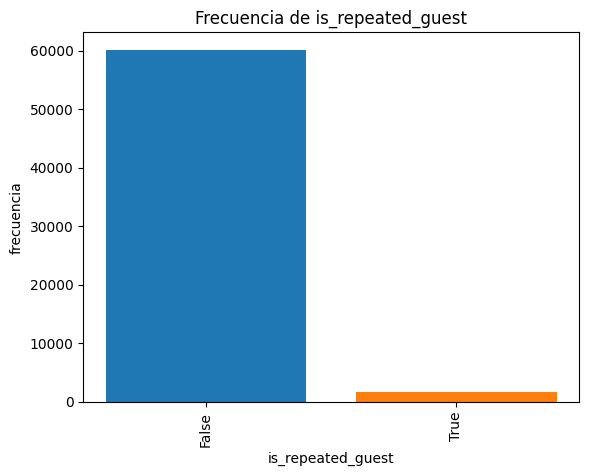

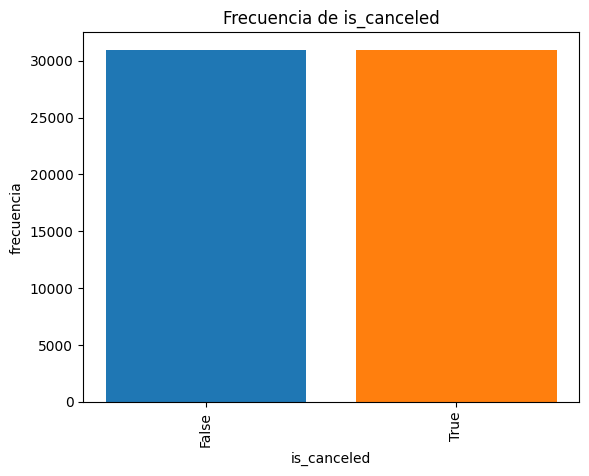

In [310]:
for i in variables_cualitativas:
    i_counts = df_hotel[i].value_counts()
    top_18 = i_counts.head(18)
    cantidad_resto = i_counts[18:].sum()
    if cantidad_resto > 0:
      top_18['resto'] = i_counts[18:].sum()
    plt.bar(top_18.index, top_18.values, color=colors)
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.ylabel('frecuencia')
    plt.title('Frecuencia de %s'%(i))
    plt.show()
    print("\n")

## **Variables Irrelevantes**

*   ### **id** 
Consideramos que el ID es irrelevante ya que no nos sirve para analizar los datos de forma masiva y no brinda ningún tipo de información más que la de identificar cada entrada.


*   ### **arrival_date_week_number** 
El número de semana de arribo es irrelevante, ya que la información que brinda, es reemplazada con mayor claridad y exactitud por la combinación de variables 'arrival_date_month' y 'arrival_date_day_of_month'.

A continuación las eliminaremos del dataframe


In [311]:
df_hotel = df_hotel.drop('id', axis=1)
df_hotel = df_hotel.drop('arrival_date_week_number', axis=1)

## Distribución de las variables

Para el análisis de la distribución de las variables cuantitativas utilizamos gráficos suaves kde de seaborn para interpretar mejor la densidad de cada variable, y dejamos afuera una cierta cantidad de outliers para que el gráfico sea legible

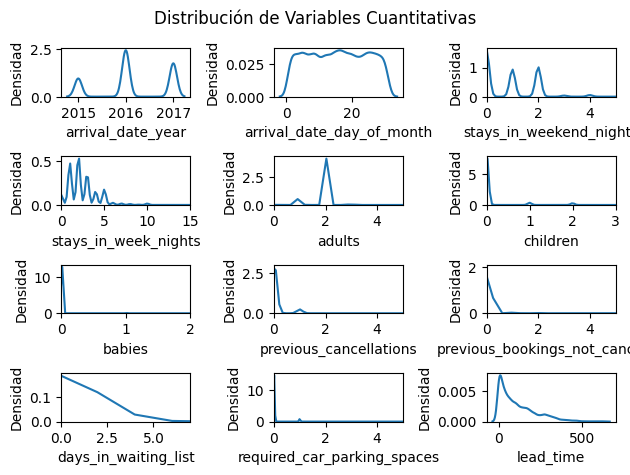

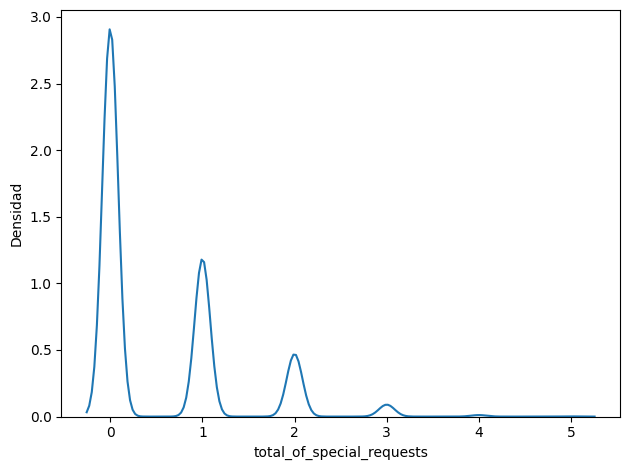

In [312]:
# Para achicar el eje: plt.xlim(0, 'numero limitador')

fig, ax = plt.subplots(4,3)
fig.suptitle('Distribución de Variables Cuantitativas')

sns_hist=sns.kdeplot(data=df_hotel['lead_time']).set(xlabel="lead_time",ylabel="Densidad")
plt.sca(ax[0, 0])
sns_hist=sns.kdeplot(data=df_hotel['arrival_date_year']).set(xlabel="arrival_date_year",ylabel="Densidad")
plt.sca(ax[0, 1])
sns_hist=sns.kdeplot(data=df_hotel['arrival_date_day_of_month']).set(xlabel="arrival_date_day_of_month",ylabel="Densidad")
plt.sca(ax[0, 2])

#sns_hist=sns.kdeplot(data=df['arrival_date_week_number']).set(xlabel="arrival_date_week_number",ylabel="Densidad")
#plt.sca(ax[1, 0])
sns_hist=sns.kdeplot(data=df_hotel['stays_in_weekend_nights']).set(xlabel="stays_in_weekend_nights",ylabel="Densidad")
plt.xlim(0, 5)
plt.sca(ax[1, 0])
sns_hist=sns.kdeplot(data=df_hotel['stays_in_week_nights']).set(xlabel="stays_in_week_nights",ylabel="Densidad")
plt.xlim(0, 15)
plt.sca(ax[1, 1])
sns_hist=sns.kdeplot(data=df_hotel['adults']).set(xlabel="adults",ylabel="Densidad")
plt.xlim(0, 5)
plt.sca(ax[1, 2])

sns_hist=sns.kdeplot(data=df_hotel['children']).set(xlabel="children",ylabel="Densidad")
plt.xlim(0, 3)
plt.sca(ax[2, 0])
sns_hist=sns.kdeplot(data=df_hotel['babies']).set(xlabel="babies",ylabel="Densidad")
plt.xlim(0, 2)
plt.sca(ax[2, 1])
sns_hist=sns.kdeplot(data=df_hotel['previous_cancellations']).set(xlabel="previous_cancellations",ylabel="Densidad")
plt.xlim(0, 5)
plt.sca(ax[2, 2])

sns_hist=sns.kdeplot(data=df_hotel['previous_bookings_not_canceled']).set(xlabel="previous_bookings_not_canceled",ylabel="Densidad")
plt.xlim(0, 5)
plt.sca(ax[3, 0])
sns_hist=sns.kdeplot(data=df_hotel['days_in_waiting_list']).set(xlabel="days_in_waiting_list",ylabel="Densidad")
plt.xlim(0, 7)
plt.sca(ax[3, 1])
sns_hist=sns.kdeplot(data=df_hotel['required_car_parking_spaces']).set(xlabel="required_car_parking_spaces",ylabel="Densidad")
plt.xlim(0, 5)
plt.sca(ax[3, 2])

fig.tight_layout()
fig.show()

fig, ax = plt.subplots(1,1)
sns_hist=sns.kdeplot(data=df_hotel['total_of_special_requests']).set(xlabel="total_of_special_requests",ylabel="Densidad")

fig.tight_layout()
fig.show()

## Correlación entre las variables

Obtenemos la matriz de correlacion de las variables cualitativas y cuantitativas y luego hacemos un análisis gráfico de las correlaciones notables.

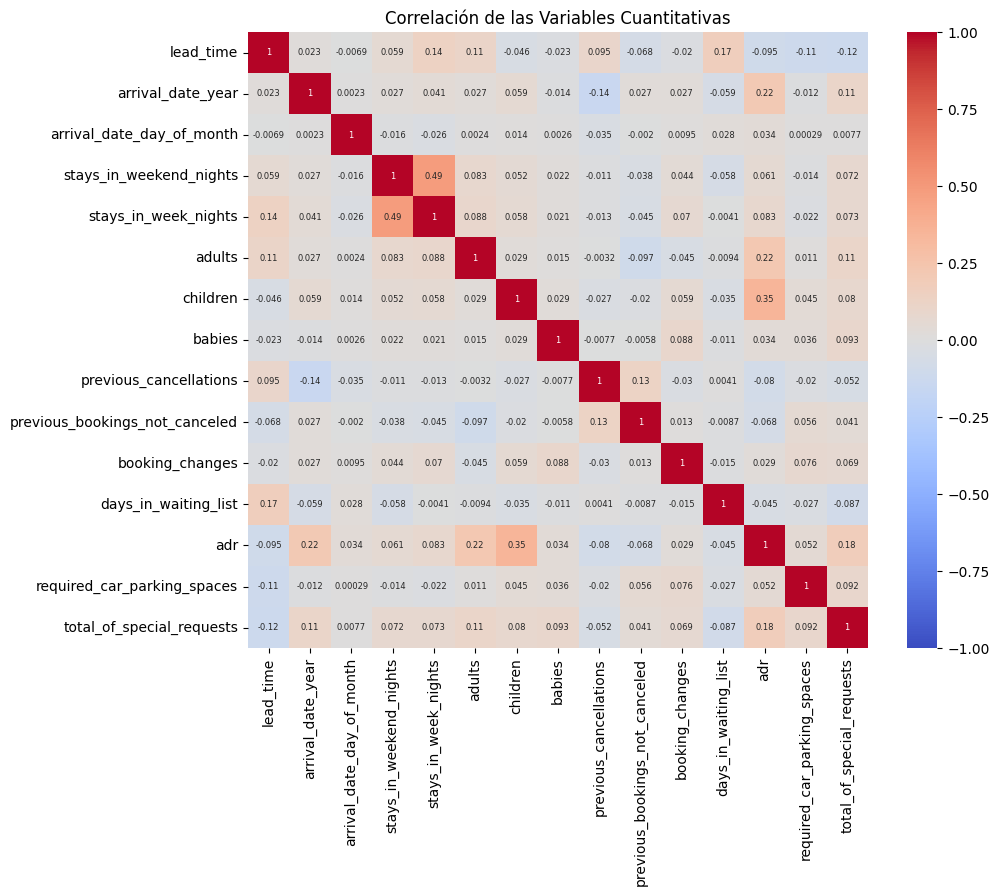

In [313]:
corr_matrix = df_hotel.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6}, vmin=-1).set(title='Correlación de las Variables Cuantitativas')
plt.xticks(rotation=90)
plt.show()

A continuación hacemos gráficos de dispersión entre las variables con mayor correlación.

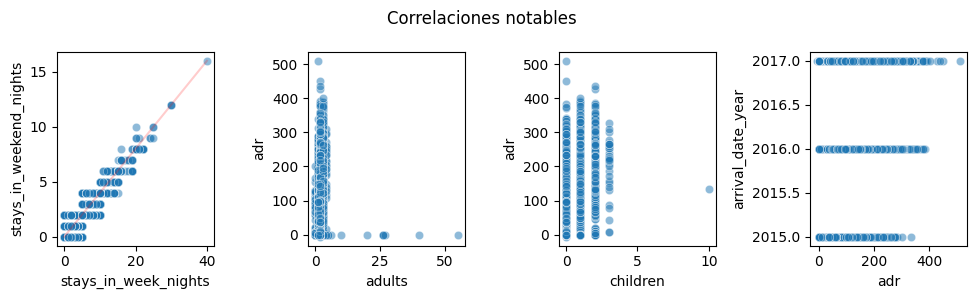

In [314]:
fig, ax = plt.subplots(1,4, figsize=(10,3))
fig.suptitle('Correlaciones notables')

sns.scatterplot(x='adr', y='arrival_date_year',data=df_hotel[['adr', 'arrival_date_year']], alpha=0.5).set(xlabel='adr', ylabel='arrival_date_year')
plt.sca(ax[0])

sns.scatterplot(x='stays_in_week_nights', y='stays_in_weekend_nights',data=df_hotel[['stays_in_week_nights', 'stays_in_weekend_nights']], alpha=0.5).set(xlabel='stays_in_week_nights', ylabel='stays_in_weekend_nights')
plt.sca(ax[1])
sns.lineplot(x=[0,df_hotel['stays_in_week_nights'].max()], y=[0,df_hotel['stays_in_weekend_nights'].max()], c='Red', alpha=0.2, ax = ax[0])

sns.scatterplot(x='adults', y='adr',data=df_hotel[['adults', 'adr']], alpha=0.5).set(xlabel='adults', ylabel='adr')
plt.sca(ax[2])

sns.scatterplot(x='children', y='adr',data=df_hotel[['children', 'adr']], alpha=0.5).set(xlabel='children', ylabel='adr')
plt.sca(ax[3])


fig.tight_layout()
fig.show()

Vease que el gráfico entre *stays_in_weekend_nights* y *stays_in_week_nights* es el único con una recta de regresión. Esto es para mostrar que el valor atípico más alejado del gráfico sigue acomodandose correctamente al resto de valores.

A continuación creamos gráficos displot de seaborn para mostrar algunas relaciones entre variables categóricas, ya que nos resultó una forma conveniente de demostrar a simple vista cómo interactuan entre sí.

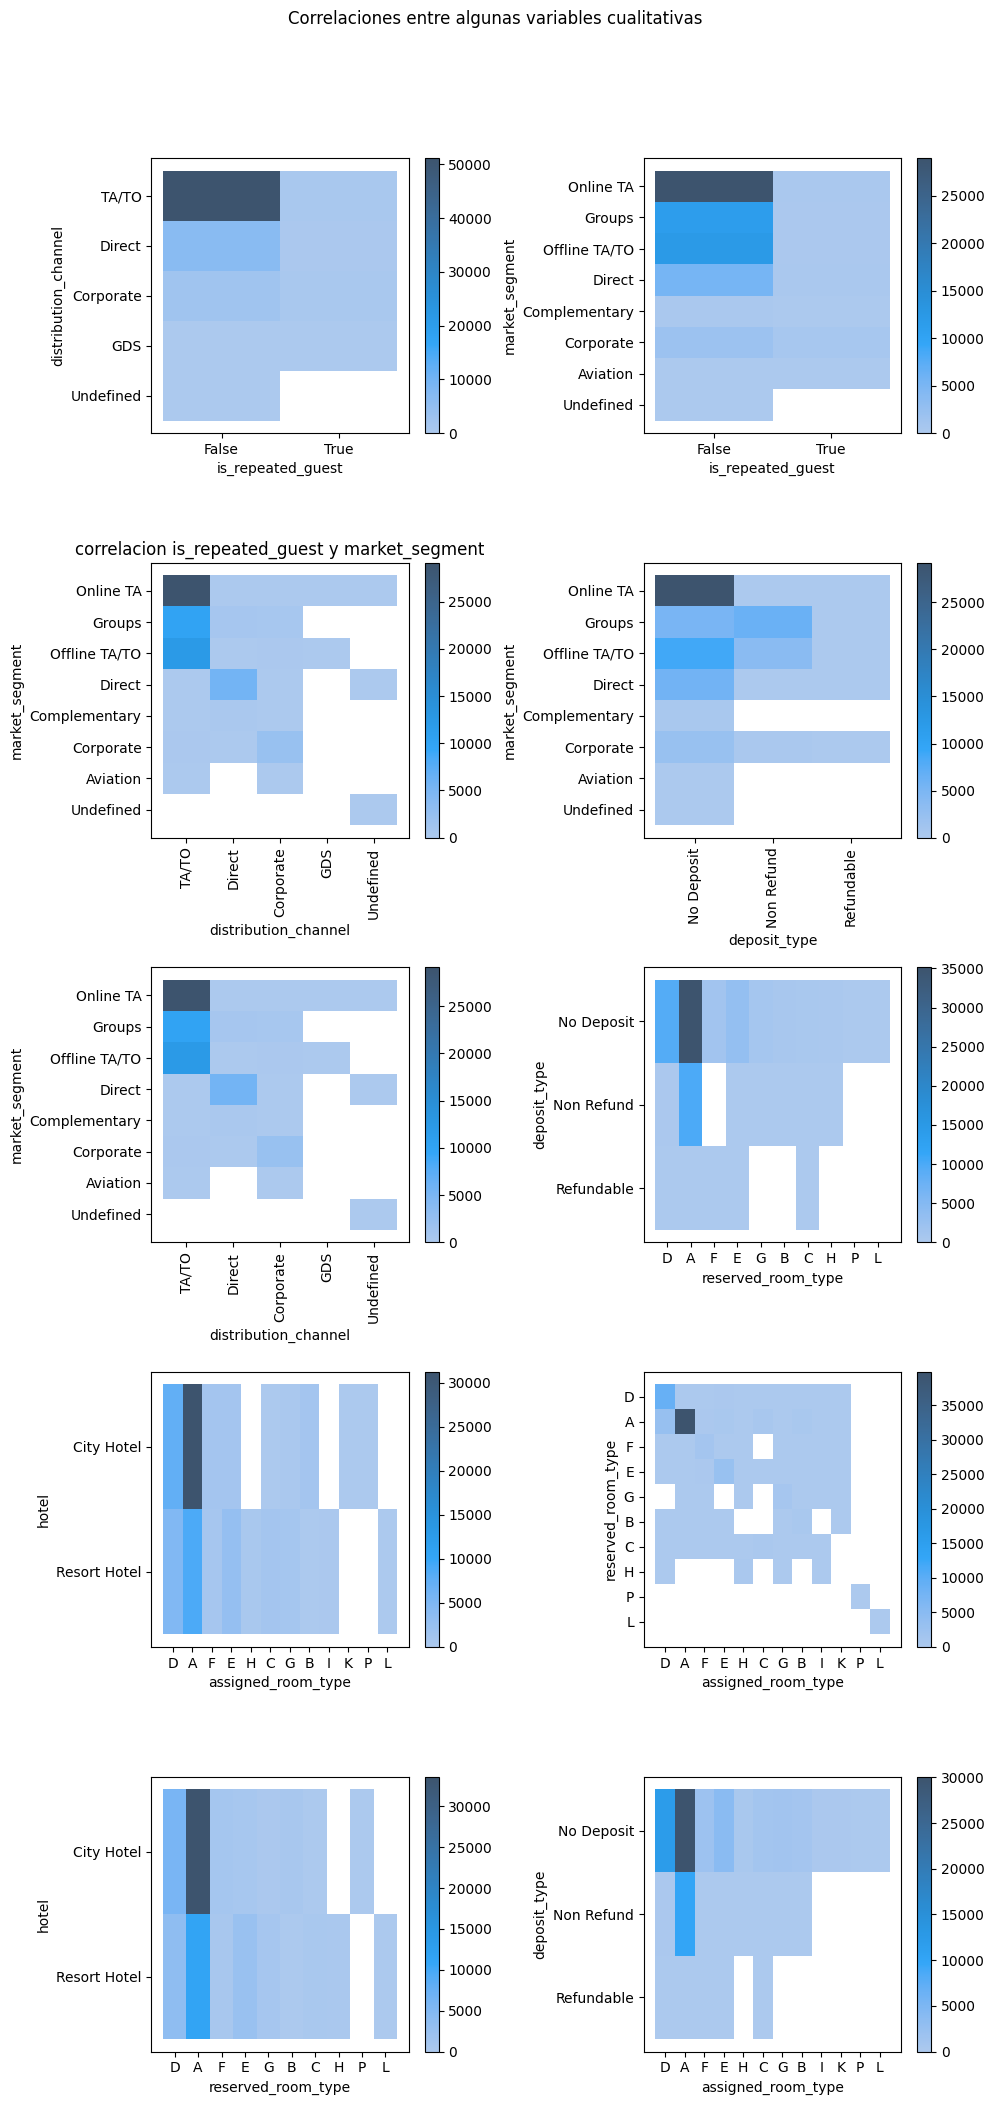

In [315]:
fig, ax = plt.subplots(5,2, figsize=(10,20))
fig.suptitle('Correlaciones entre algunas variables cualitativas', y=1.05)
plt.subplots_adjust(top=0.9)

#bivariate distribution plot
sns.histplot(df_hotel, x='assigned_room_type', y='deposit_type', cbar=True, legend=True)
plt.sca(ax[0, 0])
sns.histplot(df_hotel, x='is_repeated_guest', y='distribution_channel', cbar=True, legend=True)
plt.sca(ax[0, 1])

sns.histplot(df_hotel, x='is_repeated_guest', y='market_segment', cbar=True, legend=True)
plt.sca(ax[1, 0])
plt.title("correlacion is_repeated_guest y market_segment")
sns.histplot(df_hotel, x='distribution_channel', y='market_segment', cbar=True, legend=True)
plt.xticks(rotation=90)
plt.sca(ax[1, 1])

sns.histplot(df_hotel, x='deposit_type', y='market_segment', cbar=True, legend=True)
plt.xticks(rotation=90)
plt.sca(ax[2, 0])
sns.histplot(df_hotel, x='distribution_channel', y='market_segment', cbar=True, legend=True)
plt.xticks(rotation=90)
plt.sca(ax[2, 1])

sns.histplot(df_hotel, x='reserved_room_type', y='deposit_type', cbar=True, legend=True)
plt.sca(ax[3, 0])
sns.histplot(df_hotel, x='assigned_room_type', y='hotel', cbar=True, legend=True)
plt.sca(ax[3, 1])

sns.histplot(df_hotel, x='assigned_room_type', y='reserved_room_type', cbar=True, legend=True)
plt.sca(ax[4, 0])
sns.histplot(df_hotel, x='reserved_room_type', y='hotel', cbar=True, legend=True)
plt.sca(ax[4, 1])

fig.tight_layout()
fig.show()

Como se puede observar, existen relaciones claras entre algunas de ellas, como entre *deposit_type* y *assigned_room_type*, *is_repeated_guest* y *distribution_channel*, entre otras.

## Relación de las variables con el target

A continuación podemos ver la relación de las variables con 'is_canceled' mediante un grafico de barras de conteo.

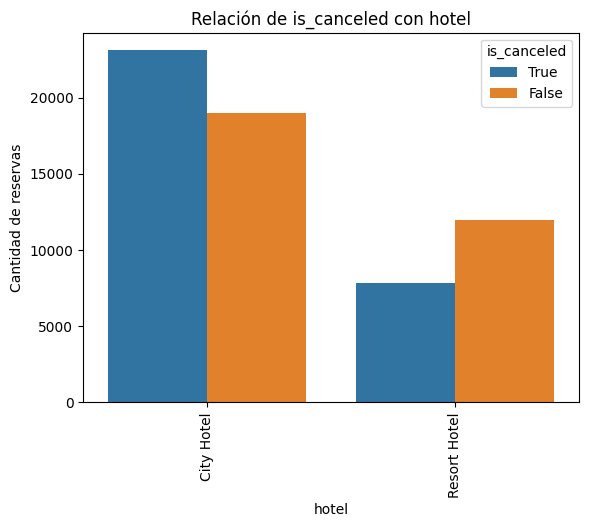

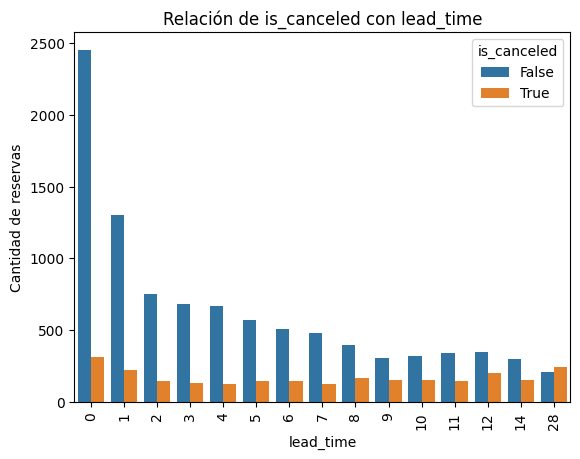

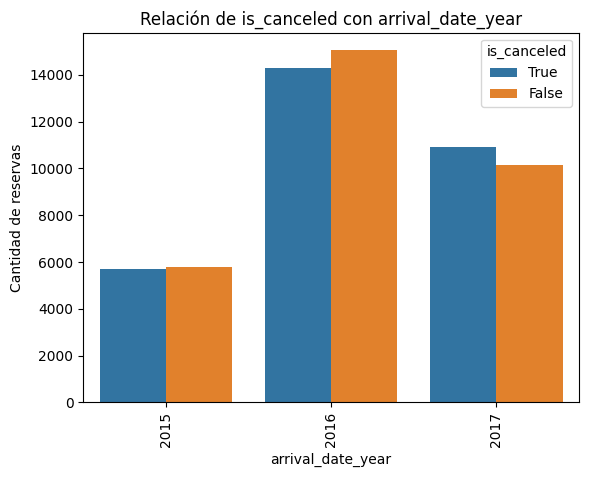

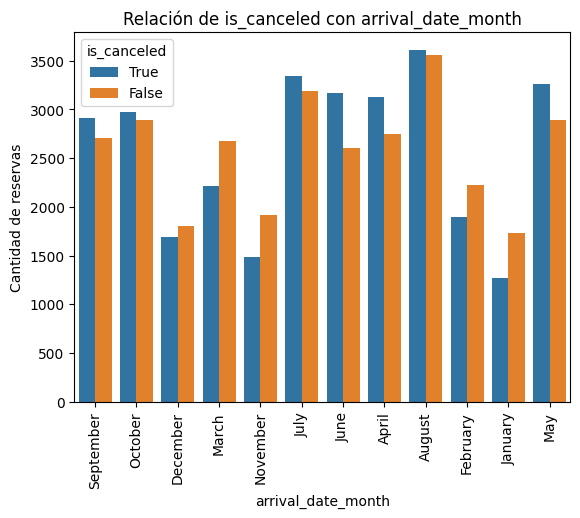

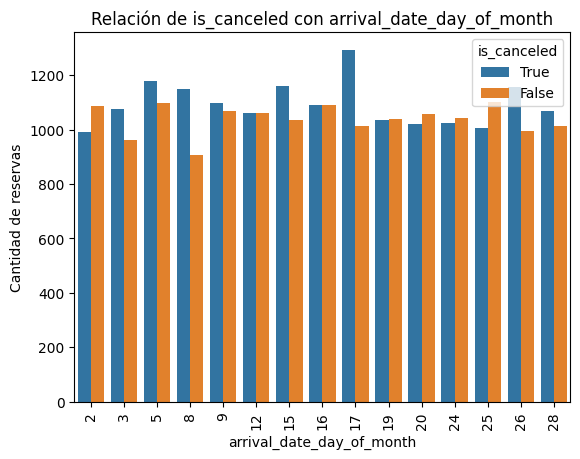

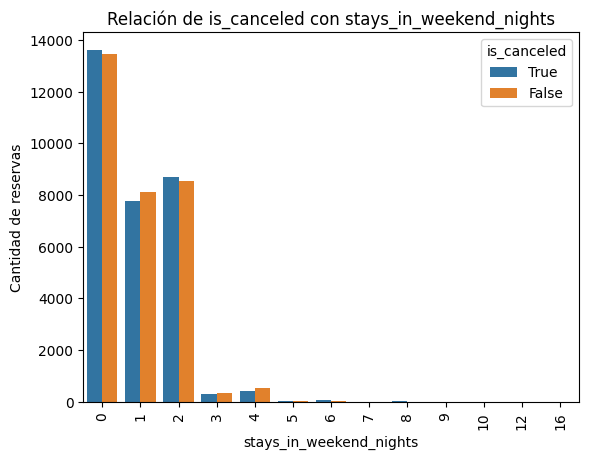

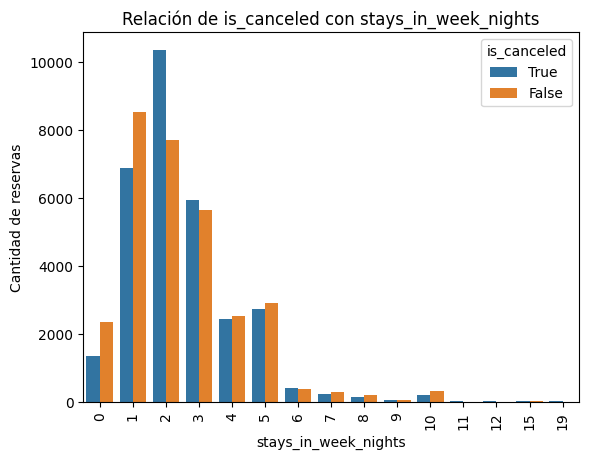

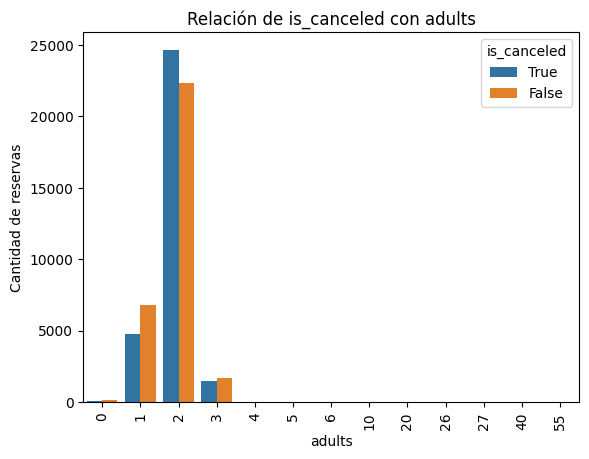

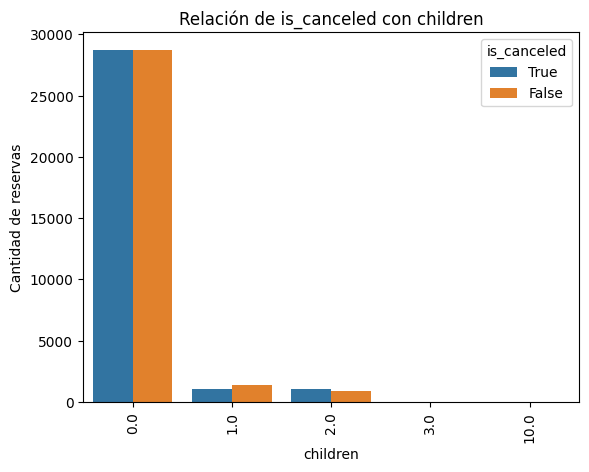

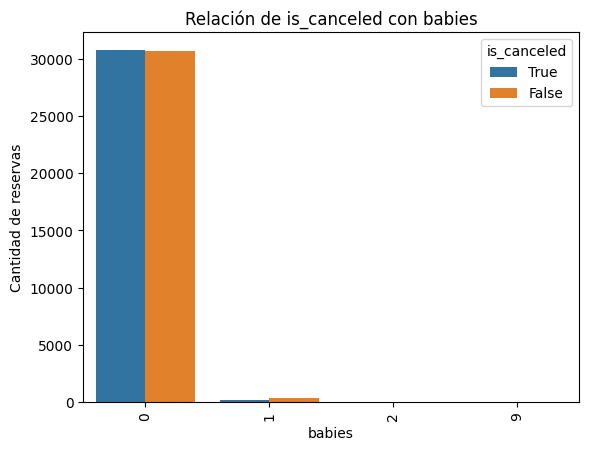

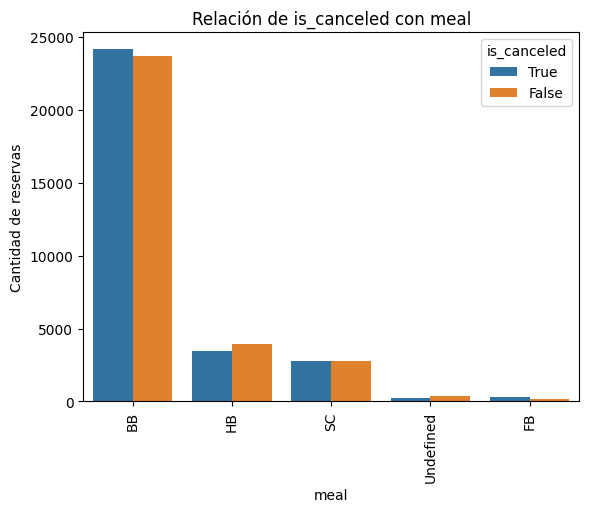

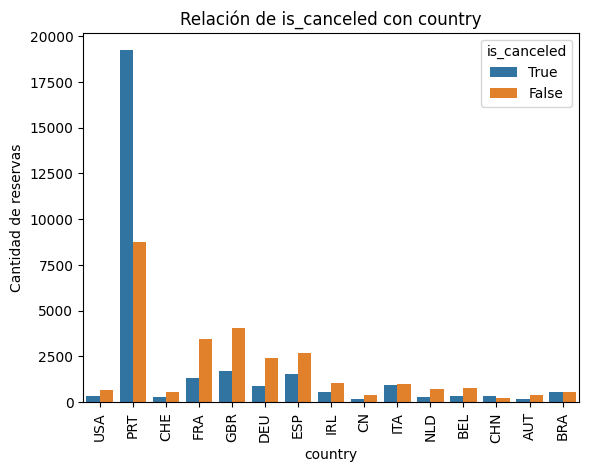

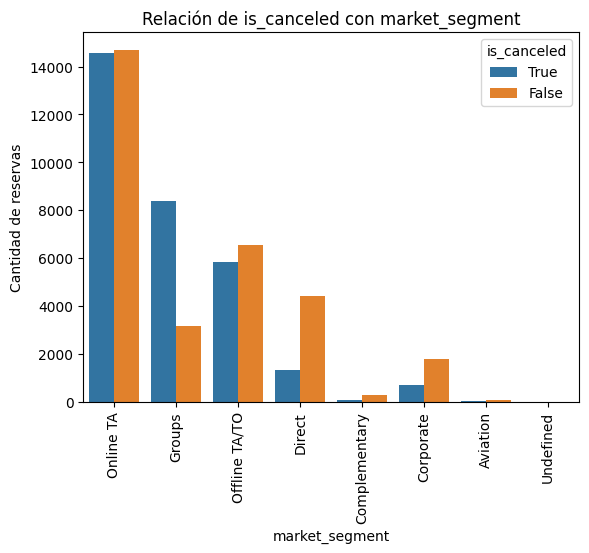

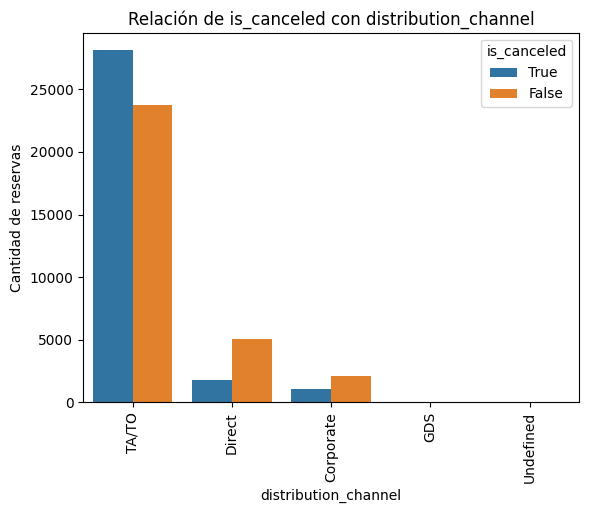

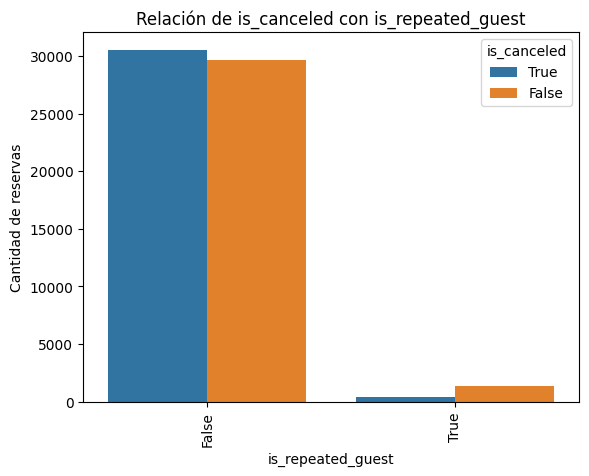

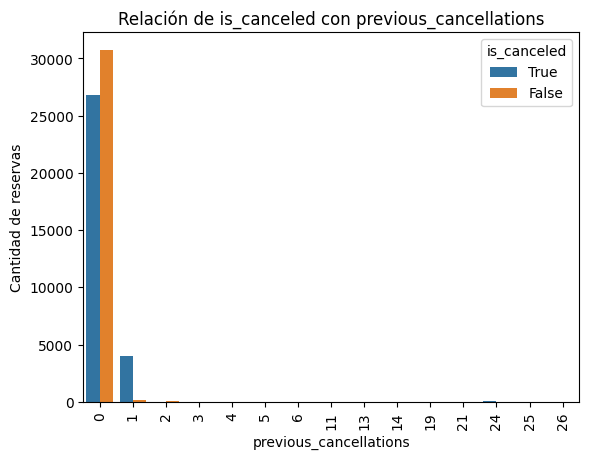

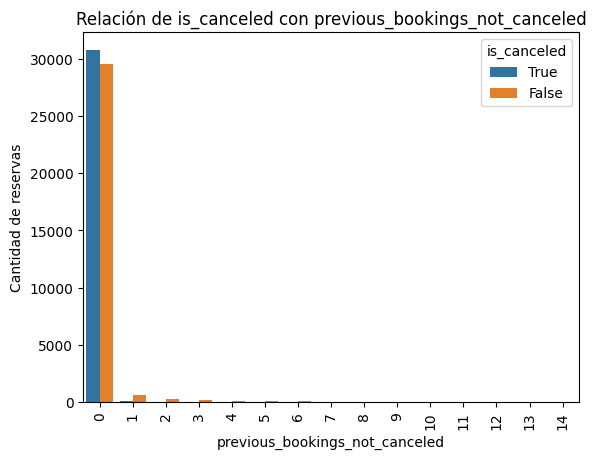

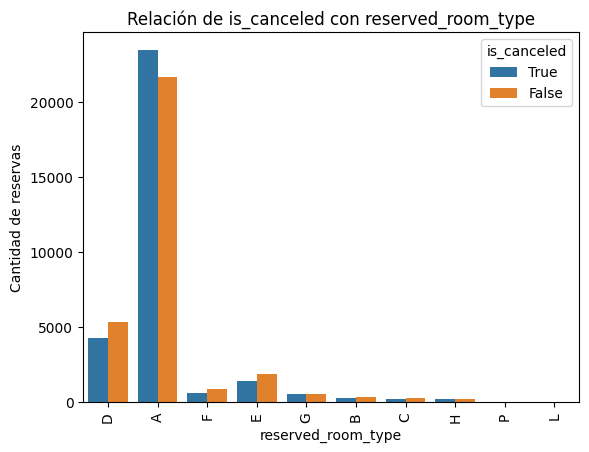

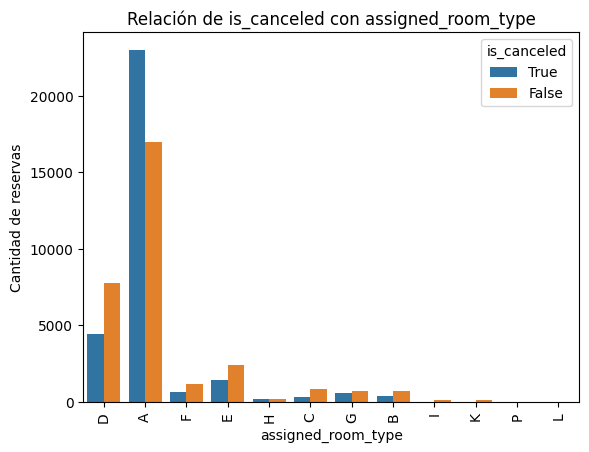

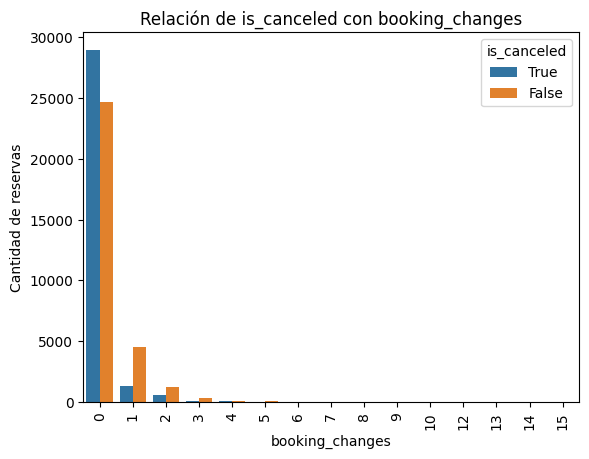

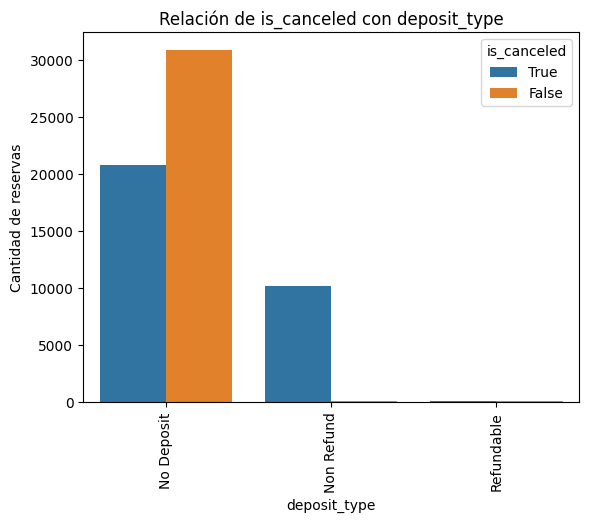

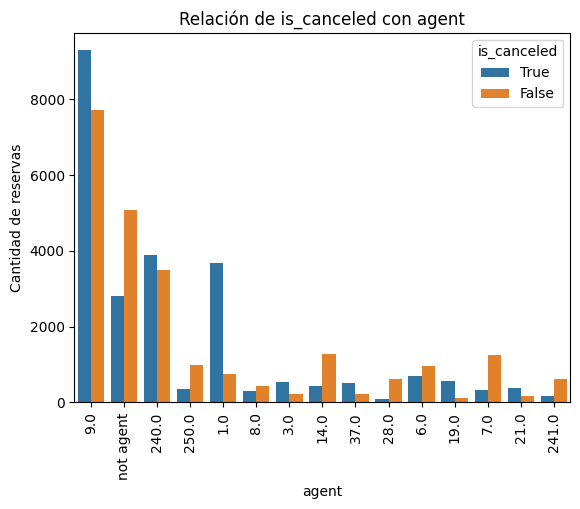

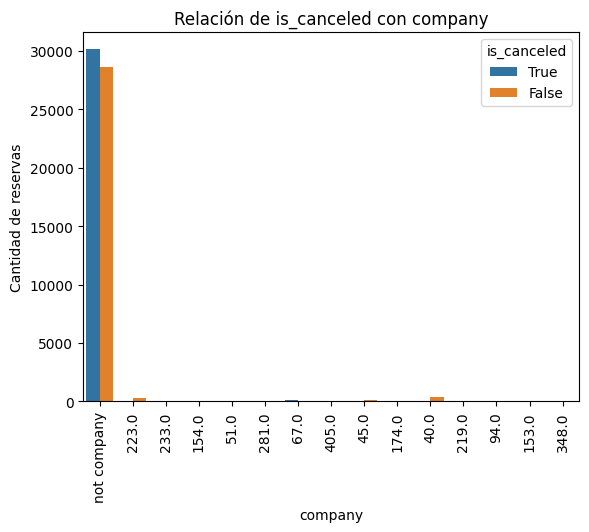

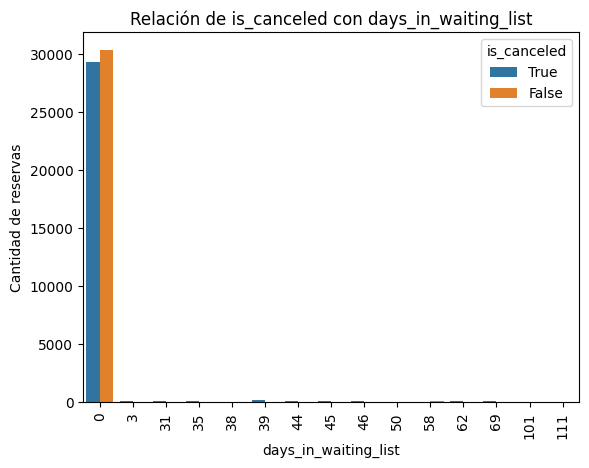

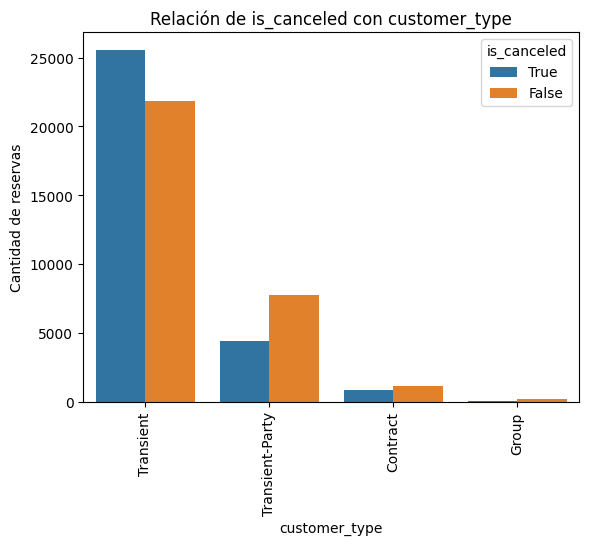

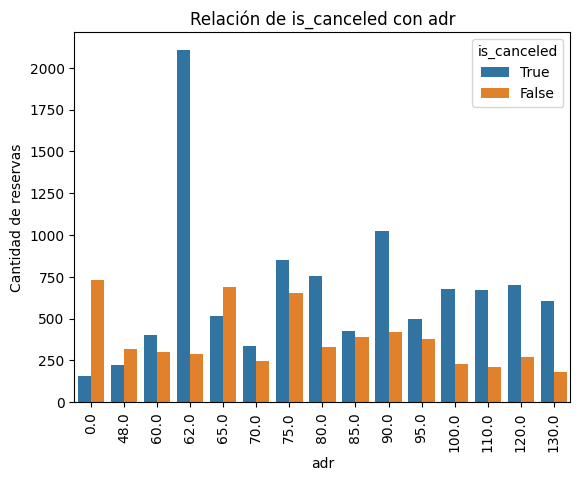

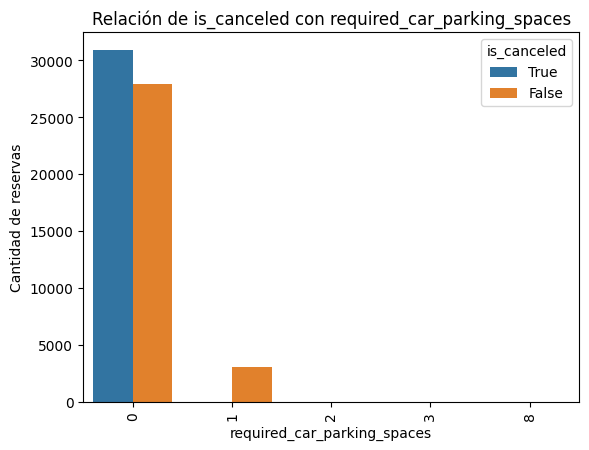

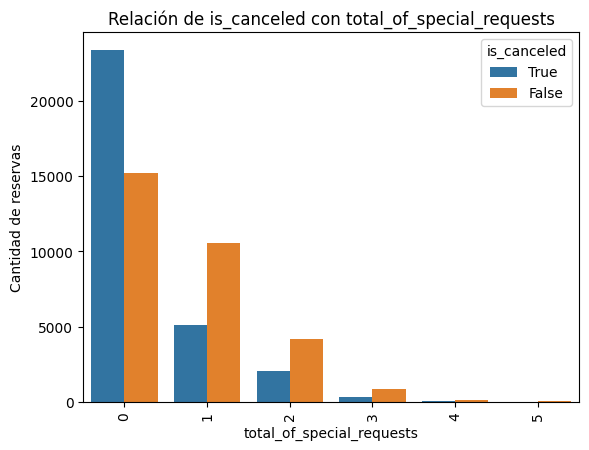

In [316]:
for i in df_hotel.columns:
  if i != 'is_canceled':
    top_15= df_hotel[i].value_counts().head(15).index.tolist()
    df_top = df_hotel[df_hotel[i].isin(top_15)]
    sns.countplot(x=i, hue='is_canceled', data=df_top)
    plt.title('Relación de is_canceled con {}'.format(i))
    plt.ylabel('Cantidad de reservas')
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

**Algunas relaciones interesantes observadas:**

*   *hotel:* En City hotel se cancela más de lo que no, contrario que Resort hotel. 
*   *lead_time:* Mientras mayor sea el lead_time, hay más cancelaciones.
*   *country:* Portugal es el país que más cancelaciones tiene en relacion a las personas que reservan.
*   *market_segment:* Groups tiene más cancelaciones con respecto a la cantidad de reservas.
*   *assigned_room_type:* Cancelan más de lo que se quedan.
*   *deposit_time:* En Non Refound casi todos cancelan.
*   *agent:* Al agente 1.0 cancelan mucho más de lo que no lo hacen.
*   *adr:* Las reservas con 62.0 adr cancelan mucho.




## Datos faltantes 

Podemos ver el porcentaje de datos faltantes de cada variable.

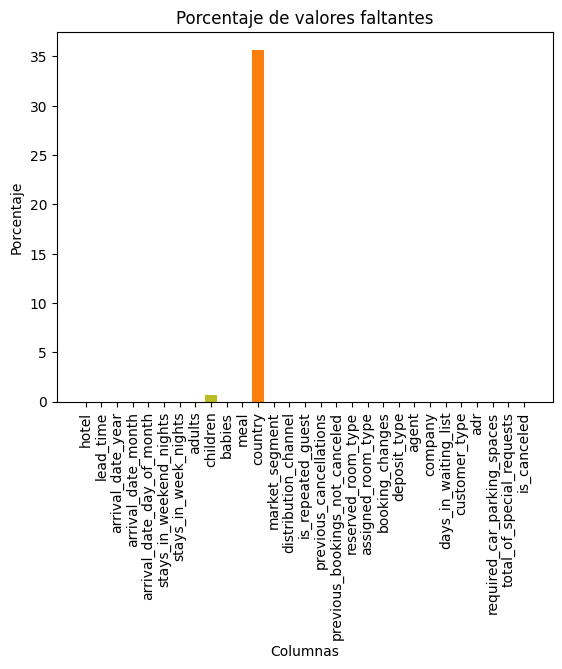

In [317]:
porcentaje_faltantes = df_hotel.isnull().sum() / len(df_hotel) * 100
porcentaje_faltantes *= 100

plt.bar(porcentaje_faltantes.index, porcentaje_faltantes.values, color=colors)
plt.xticks(rotation=90)
plt.title("Porcentaje de valores faltantes")
plt.xlabel('Columnas')
plt.ylabel('Porcentaje')
plt.show()

Elementos nulos:

* country: 4 nulos de 61913 totales
* children: 221 nulos de 61913 totales

Ambos representrban una cantidad muy pequeña respecto del total, por lo que los eliminamos de nuestro dataframe

In [318]:
df_hotel = df_hotel.dropna(subset=['country'])
df_hotel = df_hotel.dropna(subset=['children'])

Debido a que la columna *children* almacena *floats* en vez de enteros, se la castea a *int* para evitar inconsistencias.

In [319]:
df_hotel['children'] = df_hotel['children'].astype(int)

## **Valores Atipicos**

### **Relaciones univariadas**
Para este análisis, procedemos a observar los valores atipicos mediante boxplot y z-score de cada variable.

Funciones que usaremos:

In [320]:
def hacer_boxplot(una_variable):
    sns.boxplot(x=una_variable, data=df_hotel)
    plt.title('Boxplot de '+una_variable)
    plt.show()
    return

In [321]:
def analisis_boxplot(una_variable):
    Q1 = np.quantile(df_hotel[una_variable], 0.25)
    Q3 = np.quantile(df_hotel[una_variable], 0.75)
    IQR = Q3 - Q1

    print("Moderados inferiores: ",(df_hotel[una_variable] < (Q1 - 1.5*IQR)).sum())
    print("Moderados superiores: ",(df_hotel[una_variable] > (Q3 + 1.5*IQR)).sum())
    print("Severos inferiores: ",(df_hotel[una_variable] < (Q3 - 3*IQR)).sum())
    print("Severos superiores: ",(df_hotel[una_variable] > (Q1 + 3*IQR)).sum())
    return

In [322]:
df_hotel_zscore = df_hotel.copy()

def hacer_zscore(una_variable, limite_sup, limite_inf):
    media=np.mean(df_hotel_zscore[una_variable])
    std=np.std(df_hotel_zscore[una_variable])
    df_hotel_zscore['zscore_'+una_variable]=(df_hotel_zscore[una_variable] - media)/std
    df_hotel_zscore_lead_time_mayor_3 = df_hotel_zscore[df_hotel_zscore['zscore_'+una_variable]>limite_sup]
    df_hotel_zscore_lead_time_menor_neg_3 = df_hotel_zscore[df_hotel_zscore['zscore_'+una_variable]<-3]

    print("Z-score mayor que",limite_sup,": ",df_hotel_zscore_lead_time_mayor_3.shape[0])
    print("Z-score menor que",limite_inf,": ",df_hotel_zscore_lead_time_menor_neg_3.shape[0])
    return

In [323]:
def eliminar(df):
    global df_hotel, df_hotel_zscore
    indices_a_eliminar = df.index
    df_hotel = df_hotel.drop(indices_a_eliminar)
    df_hotel = df_hotel.reset_index(drop=True)

    df_hotel_zscore = df_hotel_zscore.drop(indices_a_eliminar)
    df_hotel_zscore = df_hotel_zscore.reset_index(drop=True)
    return

#### **Outliers de lead_time**
 
*Análisis mediante boxplot:*


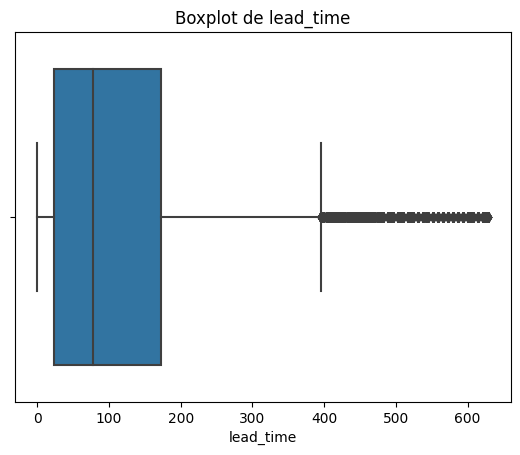

In [324]:
hacer_boxplot('lead_time')

In [325]:
analisis_boxplot('lead_time')

Moderados inferiores:  0
Moderados superiores:  1369
Severos inferiores:  0
Severos superiores:  433


In [326]:
df_lead_time_sup_sev = df_hotel[df_hotel['lead_time'] > 395.5]
print("Moderados superiores que cancelan:",df_lead_time_sup_sev[df_lead_time_sup_sev['is_canceled'] == 'True'].shape[0])

df_lead_time_sup_mod = df_hotel[df_hotel['lead_time'] > 619]
print("Severos superiores que cancelan:",df_lead_time_sup_mod[df_lead_time_sup_mod['is_canceled'] == 'True'].shape[0])

Moderados superiores que cancelan: 1099
Severos superiores que cancelan: 48


Decidimos no tocar esos datos.

*Análisis mediante z-score:*

Encontramos 732 reservas con z-score mayor a 3, de las cuales 625 cancelan.


In [327]:
hacer_zscore('lead_time', 3, -3)

Z-score mayor que 3 :  732
Z-score menor que -3 :  0



Tomamos la decisión de no modificar ni eliminar estos datos ya que son relevantes para nuestro análisis.

#### **Outliers de stays_in_weekend_nights**

*Análisis mediante boxplot:*



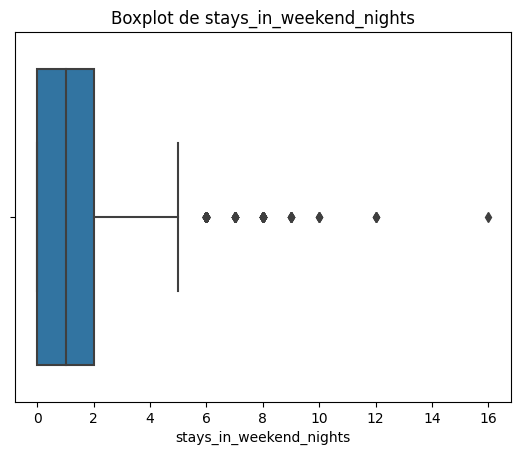

In [328]:
hacer_boxplot('stays_in_weekend_nights')

In [329]:
Q1_stays_in_weekend_nights = np.quantile(df_hotel['stays_in_weekend_nights'], 0.25)
Q3_stays_in_weekend_nights = np.quantile(df_hotel['stays_in_weekend_nights'], 0.75)
IQR_stays_in_weekend_nights = Q3_stays_in_weekend_nights - Q1_stays_in_weekend_nights

print("Moderados inferiores: ",(df_hotel['stays_in_weekend_nights'] < (Q1_stays_in_weekend_nights - 1.5*IQR_stays_in_weekend_nights)).sum())
print("Moderados superiores: ",(df_hotel['stays_in_weekend_nights'] > (Q3_stays_in_weekend_nights + 1.5*IQR_stays_in_weekend_nights)).sum())
print("Severos inferiores: ",(df_hotel['stays_in_weekend_nights'] < (Q1_stays_in_weekend_nights - 3*IQR_stays_in_weekend_nights)).sum())
print("Severos superiores: ",(df_hotel['stays_in_weekend_nights'] > (Q3_stays_in_weekend_nights + 3*IQR_stays_in_weekend_nights)).sum())

Moderados inferiores:  0
Moderados superiores:  144
Severos inferiores:  0
Severos superiores:  13


Observamos algunos de los outliers moderados superiores

In [330]:
df_hotel[df_hotel['stays_in_weekend_nights'] > (Q3_stays_in_weekend_nights + 1.5*IQR_stays_in_weekend_nights)].sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
19128,Resort Hotel,181,2017,March,1,6,19,2,0,0,HB,CN,Groups,TA/TO,False,0,0,A,A,2,No Deposit,440.0,not company,0,Transient-Party,55.80,0,1,False
31408,Resort Hotel,59,2016,November,12,9,21,1,0,0,BB,SWE,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,not company,0,Transient,37.70,0,1,True
9051,Resort Hotel,181,2017,March,1,6,19,2,0,0,HB,PRT,Groups,TA/TO,False,0,0,A,A,0,No Deposit,440.0,not company,0,Transient-Party,58.60,0,0,True
14305,Resort Hotel,162,2016,March,4,6,15,2,0,0,HB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,96.0,not company,0,Transient,82.00,0,0,True
29468,Resort Hotel,285,2017,June,18,6,15,1,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,1,No Deposit,40.0,not company,0,Contract,49.95,0,1,True


Vemos que se tratan de casos posibles, ahora vamos a concentrarnos ahora en los severos.

In [331]:
df_hotel[df_hotel['stays_in_weekend_nights'] > (Q3_stays_in_weekend_nights + 3*IQR_stays_in_weekend_nights)].head(13)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
3855,City Hotel,123,2017,January,15,10,20,3,0,0,BB,AGO,Online TA,TA/TO,False,0,0,D,D,1,No Deposit,9.0,not company,0,Transient,140.00,0,0,True
9229,Resort Hotel,13,2016,April,25,9,24,2,0,0,BB,PRT,Corporate,Corporate,False,0,0,D,D,0,No Deposit,not agent,110.0,0,Transient,77.00,0,0,True
14236,City Hotel,25,2015,November,30,9,24,2,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,1,No Deposit,not agent,not company,0,Transient,98.33,0,0,True
18816,City Hotel,12,2016,February,1,9,20,1,0,0,BB,AGO,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Transient,63.03,0,1,True
30395,Resort Hotel,88,2017,January,24,10,25,2,0,0,BB,GBR,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Transient,41.47,0,1,False
31310,Resort Hotel,322,2017,January,10,16,40,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,8.0,not company,0,Transient,25.50,0,0,True
31408,Resort Hotel,59,2016,November,12,9,21,1,0,0,BB,SWE,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,not company,0,Transient,37.70,0,1,True
43667,Resort Hotel,242,2017,February,17,12,30,2,0,0,BB,DEU,Offline TA/TO,TA/TO,False,0,0,D,D,0,No Deposit,75.0,not company,0,Transient,35.70,0,1,False
47601,City Hotel,3,2016,November,14,9,25,2,0,0,BB,PRT,Corporate,Corporate,False,0,0,A,A,3,No Deposit,not agent,368.0,0,Transient,93.00,0,0,False
54391,Resort Hotel,122,2016,January,12,12,30,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,8.0,not company,0,Transient,22.11,0,0,True


Son todos casos posibles, pero vamos a ver en mayor profundidad a uno de ellos.

In [332]:
df_stays_in_weekend_nights_sup_sev = df_hotel[df_hotel['stays_in_weekend_nights'] == 16]
df_stays_in_weekend_nights_sup_sev.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
31310,Resort Hotel,322,2017,January,10,16,40,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,8.0,not company,0,Transient,25.5,0,0,True


Este caso, por más de que se trata de un valor posible, creemos que se aleja del patrón observado, por lo que tomamos la decisión de eliminarlo.

In [333]:
eliminar(df_stays_in_weekend_nights_sup_sev)

*Análisis mediante z-score:*

*    Encontramos 1118 reservas con z-score mayor a 3 y 144 con z-score > 5.

Observando los datos, decidimos no eliminar ni modificar más datos ya que nos parecen relevantes para nuestro objetivo.

In [334]:
hacer_zscore('stays_in_weekend_nights', 5, -5)

Z-score mayor que 5 :  143
Z-score menor que -5 :  0


#### **Outliers de adults**

*Análisis mediante boxplot:*


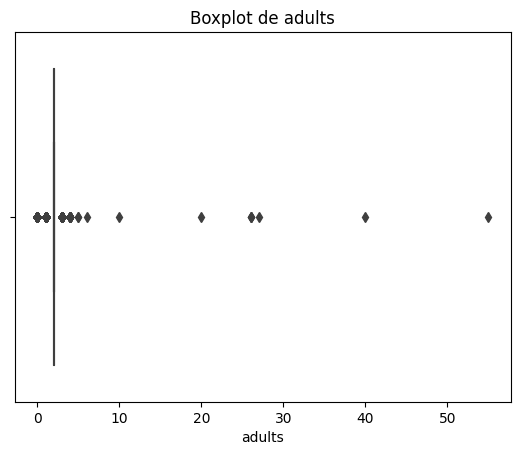

In [335]:
hacer_boxplot('adults')

In [336]:
analisis_boxplot('adults')

Moderados inferiores:  11619
Moderados superiores:  3200
Severos inferiores:  11619
Severos superiores:  3200


Observamos outliers inferiores en donde adults es cero. Esto es un caso posible, aun que hay que analizarlos más en detalle, vamos a hacerlo luego en el análisis multivariado de 'adults' con 'children'.

In [337]:
df_hotel[df_hotel['adults'] == 0].sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
15378,City Hotel,111,2017,January,2,1,3,0,2,0,BB,RUS,Online TA,TA/TO,False,0,0,B,B,0,No Deposit,9.0,not company,0,Transient,91.60,0,2,True
10017,City Hotel,0,2017,January,9,0,0,0,0,0,SC,PRT,Online TA,TA/TO,True,0,0,A,K,0,No Deposit,9.0,not company,0,Transient,0.00,0,2,False
18584,City Hotel,102,2016,December,26,1,3,0,2,0,BB,ESP,Online TA,TA/TO,False,0,0,B,B,0,No Deposit,9.0,not company,0,Transient-Party,101.34,0,0,True
14864,City Hotel,44,2016,November,19,0,1,0,2,0,BB,PRT,Online TA,TA/TO,False,0,0,B,B,0,No Deposit,9.0,not company,0,Transient,82.44,0,2,True
52047,City Hotel,104,2016,December,25,2,1,0,2,0,BB,FRA,Online TA,TA/TO,False,0,0,B,A,0,No Deposit,9.0,not company,0,Transient,91.60,0,2,False


Luego, en outliers superiores observemos los datos superiores a 4

In [338]:
df_mas_adultos = df_hotel[df_hotel['adults'] > 4]
df_mas_adultos.head(11)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
3940,Resort Hotel,328,2015,October,6,2,5,5,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
4042,Resort Hotel,304,2015,September,3,0,3,40,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
11779,Resort Hotel,334,2015,October,12,2,5,20,0,0,BB,PRT,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
13046,Resort Hotel,328,2015,October,6,2,5,6,0,0,BB,PRT,Direct,Direct,False,0,0,E,E,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
19071,Resort Hotel,354,2015,September,26,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,96.0,not company,0,Group,0.0,0,0,True
35341,Resort Hotel,334,2015,October,12,2,5,10,0,0,BB,PRT,Direct,Direct,False,0,0,E,E,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
36737,Resort Hotel,334,2015,October,12,2,5,5,0,0,BB,PRT,Direct,Direct,False,0,0,A,A,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
38160,Resort Hotel,340,2015,September,12,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,96.0,not company,0,Group,0.0,0,0,True
54917,Resort Hotel,349,2015,September,21,1,3,27,0,0,HB,PRT,Direct,Direct,False,0,0,A,A,0,No Deposit,not agent,not company,0,Group,0.0,0,0,True
58842,Resort Hotel,333,2015,September,5,2,5,26,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,96.0,not company,0,Group,0.0,0,0,True


Podemos ver que existen casos en donde adults toma valores muy altos y fuera de lo común, como lo es 40 adults. Pero veamos el siguiente detalle: Todos los casos superiores a 4 is_canceled es True.

In [339]:
print("Son iguales:",df_mas_adultos.shape[0] == df_mas_adultos[df_mas_adultos['is_canceled'] == 'True'].shape[0])

Son iguales: True


Tomamos la decisión de eliminar los casos superiores a 25, ya que se aleja mucho del patron de comportamiento, y además son muy pocos casos.

In [340]:
df_mas_adultos = df_hotel[df_hotel['adults'] > 25]
eliminar(df_mas_adultos)

*Analisis mediante z-score:*

In [341]:
hacer_zscore('adults', 3, -3)

Z-score mayor que 3 :  35
Z-score menor que -3 :  192


Decidimos no modificar ni eliminar más datos de adults momentaneamente.

#### **Outliers de children**

*Analisis mediante boxplot:*

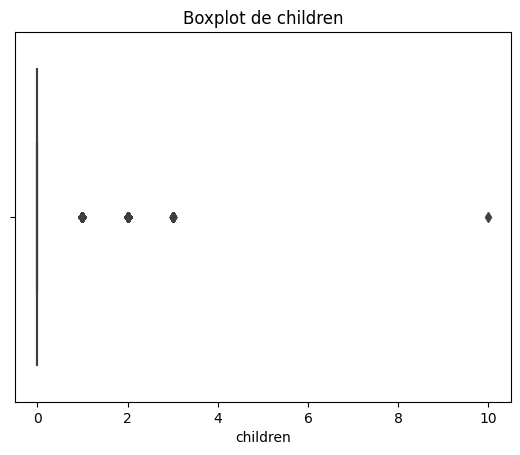

In [342]:
hacer_boxplot('children')

In [343]:
analisis_boxplot('children')

Moderados inferiores:  0
Moderados superiores:  4450
Severos inferiores:  0
Severos superiores:  4450


Veamos los outliers mayores a 4.

In [344]:
df_mas_children = df_hotel[df_hotel['children'] > 4]
df_mas_children

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
49006,Resort Hotel,55,2015,July,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,D,D,2,No Deposit,8.0,not company,0,Contract,133.16,0,1,True


Como es un caso aislado por fuera del comportamiento estándar decidimos eliminarlo.

In [345]:
eliminar(df_mas_children)

*Analisis mediante z-score:*

In [346]:
hacer_zscore('children', 3, -3)

Z-score mayor que 3 :  1994
Z-score menor que -3 :  0


Decidimos no eliminar ni modificar los datos.

#### **Outliers de babies**

*Analisis mediante boxplot:*

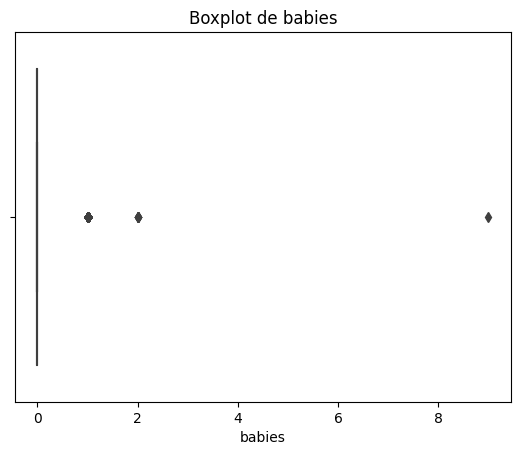

In [347]:
hacer_boxplot('babies')

In [348]:
analisis_boxplot('babies')

Moderados inferiores:  0
Moderados superiores:  428
Severos inferiores:  0
Severos superiores:  428


Miremos los casos en donde babies sea mayor a 2.

In [349]:
df_mas_children = df_hotel[df_hotel['babies'] > 2]
df_mas_children

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
12603,City Hotel,11,2015,October,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,False,0,0,A,B,1,No Deposit,95.0,not company,0,Transient-Party,95.0,0,0,False


Como es un único caso, decidimos eliminarlo.

In [350]:
eliminar(df_mas_children)

#### **Outliers previous_cancellations**
*Analisis mediante boxplot:*

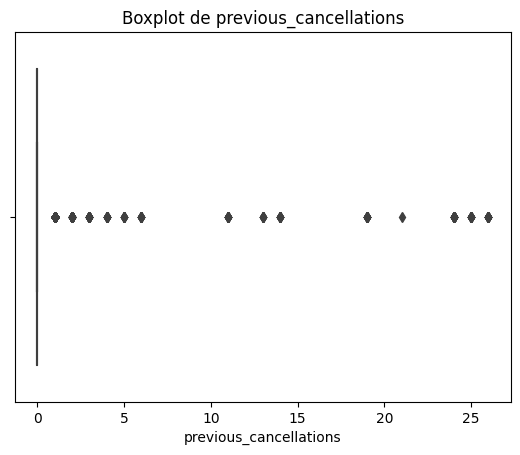

In [351]:
hacer_boxplot('previous_cancellations')

In [352]:
analisis_boxplot('previous_cancellations')

Moderados inferiores:  0
Moderados superiores:  4371
Severos inferiores:  0
Severos superiores:  4371


Del total de los casos, 4371 tienen previous_cancellation mayor que cero.

In [353]:
df_superiores = df_hotel[df_hotel['previous_cancellations'] > 0]
df_superiores[df_superiores['is_canceled'] == 'True'].shape[0]

4153

Podemos ver que los casos en los que previous_cancellations es mayor a cero, en su gran mayoría is_canceled es True. 

Por este análisis decidimos no eliminarlos, ya que son importantes en relación a predecir is_canceled.

*Analisis mediante z-score:*

In [354]:
hacer_zscore('previous_cancellations', 3, -3)

Z-score mayor que 3 :  162
Z-score menor que -3 :  0


Analizamos con mayor profundidad con un z-score mayor a 5.

In [355]:
df_zscore_mayor_5 = df_hotel_zscore[df_hotel_zscore['zscore_previous_cancellations']>5]
print(df_zscore_mayor_5.shape[0])
df_zscore_mayor_5[df_zscore_mayor_5['is_canceled'] == 'True'].shape[0]

137


120

Podemos ver que en su gran mayoría, los casos con z-score mayor a 5 is_canceled es True, por lo que son datos relevantes para nuestro objetivo, por lo que no serán removidos ni modificados.

#### **Outliers previous_bookings_not_canceled**
*Analisis mediante boxplot:*

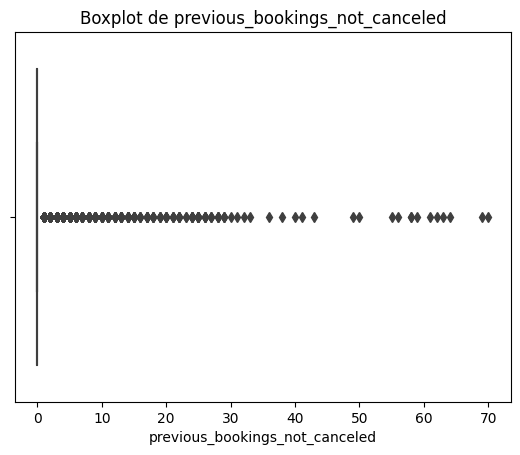

In [356]:
hacer_boxplot('previous_bookings_not_canceled')

In [357]:
analisis_boxplot('previous_bookings_not_canceled')

Moderados inferiores:  0
Moderados superiores:  1444
Severos inferiores:  0
Severos superiores:  1444


Del total de los casos, 1444 tienen previous_cancellation mayor que cero.

In [358]:
df_superiores = df_hotel[df_hotel['previous_bookings_not_canceled'] > 0]
df_superiores[df_superiores['is_canceled'] == 'False'].shape[0]

1320

Podemos ver que los casos en los que previous_bookings_not_canceled es mayor a cero, en su gran mayoría is_canceled es False. 

Por ello decidimos no eliminarlos, por que son importantes para el objetivo.

*Analisis mediante z-score:*

In [359]:
hacer_zscore('previous_bookings_not_canceled', 3, -3)

Z-score mayor que 3 :  383
Z-score menor que -3 :  0


Analizamos con mayor profundidad los datos con un z-score mayor a 3.

In [360]:
df_zscore_mayor_3 = df_hotel_zscore[df_hotel_zscore['zscore_previous_bookings_not_canceled']>3]
df_zscore_mayor_3[df_zscore_mayor_3['is_canceled'] == 'False'].shape[0]

342

Podemos ver que en su gran mayoría, los casos con z-score mayor a 3 is_canceled es False, son datos importantes, por lo que no serán eliminados ni modificados.

#### **Outliers booking_changes**
*Analisis mediante boxplot:*

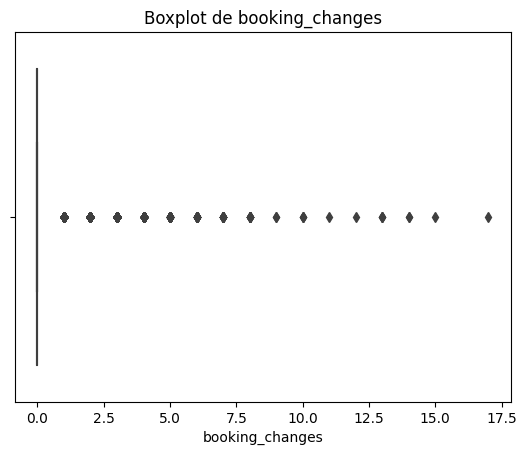

In [361]:
hacer_boxplot('booking_changes')

In [362]:
analisis_boxplot('booking_changes')

Moderados inferiores:  0
Moderados superiores:  8279
Severos inferiores:  0
Severos superiores:  8279


Observemos los datos con un umbral de 4.

In [363]:
df_superiores = df_hotel[df_hotel['booking_changes'] > 4]
print(df_superiores.shape[0])
df_superiores[df_superiores['is_canceled'] == 'True'].shape[0]

130


36

Vemos que hay mayoría de casos en donde is_canceled es False, por lo que tomamos la desición de no eliminarlos.

*Analisis mediante z-score:*

In [364]:
hacer_zscore('booking_changes', 3, -3)

Z-score mayor que 3 :  700
Z-score menor que -3 :  0


In [365]:
hacer_zscore('booking_changes', 5, -5)

Z-score mayor que 5 :  293
Z-score menor que -5 :  0


Elegimos no hacer nada más con estos datos.

#### **Outliers days_in_waiting_list**
*Analisis mediante boxplot:*

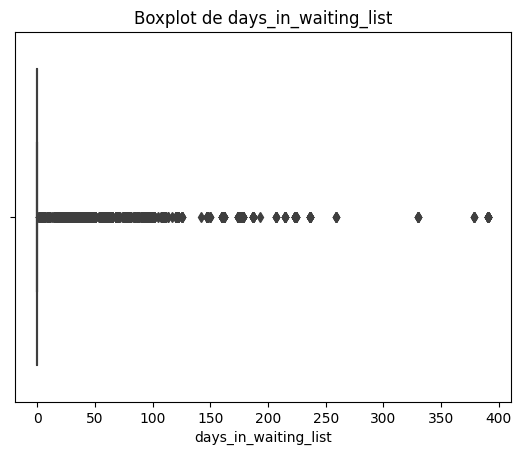

In [366]:
hacer_boxplot('days_in_waiting_list')

In [367]:
analisis_boxplot('days_in_waiting_list')

Moderados inferiores:  0
Moderados superiores:  2235
Severos inferiores:  0
Severos superiores:  2235


Podemos ver que los outliers se concentran especialmente entre 0 y 130 aproximadamente, por lo que observaremos los datos con un limite de 200.

In [368]:
df_superiores = df_hotel[df_hotel['days_in_waiting_list'] > 200]
df_superiores.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
518,City Hotel,443,2016,October,7,0,2,2,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,1.0,not company,391,Transient,65.00,0,0,True
1233,City Hotel,418,2016,September,26,1,2,2,0,0,HB,DEU,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,132.0,not company,223,Transient-Party,107.00,0,0,False
1912,City Hotel,309,2016,May,13,1,2,2,0,0,HB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,3.0,not company,215,Transient-Party,101.00,0,0,True
2795,City Hotel,298,2016,May,10,0,2,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,12.0,not company,207,Transient-Party,75.00,0,0,True
3672,City Hotel,288,2016,May,5,0,3,2,0,0,HB,FRA,Groups,TA/TO,False,0,0,A,A,0,No Deposit,1.0,not company,236,Transient-Party,81.67,0,0,False


In [369]:
print("Cantidad de reservas con days_in_waiting_list mayor a 200:",df_superiores.shape[0])
print("De esas, cantidad del año 2016:",df_superiores[df_superiores['arrival_date_year'] == 2016].shape[0])
print("De esas, cantidad con 2 o más adultos:",df_superiores[df_superiores['adults'] >= 2].shape[0])

Cantidad de reservas con days_in_waiting_list mayor a 200: 128
De esas, cantidad del año 2016: 128
De esas, cantidad con 2 o más adultos: 125


Son resultados similares e interesantes, vamos a dejarlas en nuestros datos.

In [370]:
hacer_zscore('days_in_waiting_list', 3, -3)

Z-score mayor que 3 :  965
Z-score menor que -3 :  0


Siguen siendo muchos datos, vamos a observar con un umbral mayor.

In [371]:
df_superiores = df_hotel_zscore[df_hotel_zscore['zscore_days_in_waiting_list']>5]
print("Z-score mayor que 5:",df_superiores.shape[0])
df_superiores.head()

Z-score mayor que 5: 504


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,zscore_lead_time,zscore_stays_in_weekend_nights,zscore_adults,zscore_children,zscore_previous_cancellations,zscore_previous_bookings_not_canceled,zscore_booking_changes,zscore_days_in_waiting_list
11,City Hotel,349,2016,October,4,1,5,1,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,58.0,not company,162,Transient-Party,80.0,0,0,True,2.135520,0.075498,-1.763718,-0.261721,-0.115366,-0.080303,-0.320762,8.542679
471,City Hotel,276,2016,May,13,2,3,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,Non Refund,21.0,not company,160,Transient,61.0,0,0,True,1.476325,1.084215,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,8.435461
518,City Hotel,443,2016,October,7,0,2,2,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,1.0,not company,391,Transient,65.0,0,0,True,2.984347,-0.933219,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,20.819185
1233,City Hotel,418,2016,September,26,1,2,2,0,0,HB,DEU,Offline TA/TO,TA/TO,False,0,0,A,A,0,No Deposit,132.0,not company,223,Transient-Party,107.0,0,0,False,2.758595,0.075498,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,11.812840
1533,City Hotel,211,2016,May,20,0,2,2,0,0,BB,PRT,Offline TA/TO,TA/TO,False,0,0,A,A,0,Non Refund,6.0,not company,111,Transient,100.0,0,0,True,0.889370,-0.933219,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,5.808610


No haremos nada con estos datos.

#### **Outliers adr**
*Analisis mediante boxplot:*

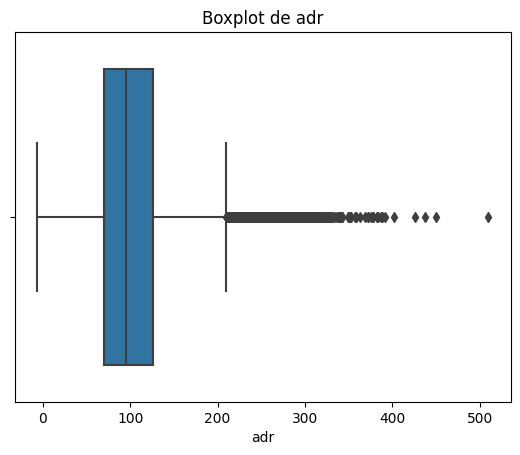

In [372]:
hacer_boxplot('adr')

In [373]:
analisis_boxplot('adr')

Moderados inferiores:  0
Moderados superiores:  2022
Severos inferiores:  0
Severos superiores:  956


In [374]:
# Vamos a elevar más el limite para tener los outliers más lejanos
df_superiores = df_hotel[df_hotel['adr'] > 315]
print(df_superiores.shape[0])
df_superiores[df_superiores['is_canceled'] == 'True'].shape[0]

83


37

Decidimos eliminar estos datos, ya que se aleja del patrón de comportamiento, es una cantidad poco significatida y además no parecen estar ligados a is_canceled

In [375]:
eliminar(df_superiores)

Vemos que hay datos con adr menor o igual a 0.

In [376]:
df_inferiores = df_hotel[df_hotel['adr'] <= 0]
print("Cantidad de casos con adr igual a cero:",df_inferiores.shape[0])

Cantidad de casos con adr igual a cero: 870


Ya que se trata de un caso imposible, y además al ser una cantidad de datos representativa no queremos eliminarlo, por lo que tomamos la medida menos drástica de cambiar esos datos por la mediana calculada sin contar adr = 0.

Además de ello vamos a comparar las distribución anterior con la nueva.

In [377]:
adr_describe = df_hotel['adr'].describe()
adr_mode = df_hotel['adr'].mode()
adr_median = df_hotel['adr'].median()

In [378]:
median_adr = df_hotel.loc[df_hotel['adr'] != 0, 'adr'].median()
filtro_adr_cero = (df_hotel['adr'] <= 0)
df_hotel.loc[filtro_adr_cero, 'adr'] = median_adr

In [379]:
new_adr_describe = df_hotel['adr'].describe()
new_adr_mode = df_hotel['adr'].mode()
new_adr_median = df_hotel['adr'].median()

table = pd.concat([adr_describe, new_adr_describe], axis=1, keys=['Antes', 'Después'])
table.loc['mode'] = [adr_mode, new_adr_mode]
table.loc['median'] = [adr_median, new_adr_median]
table

,Antes,Después
count,61596.0,61596.0
mean,102.214906,103.556818
std,46.861559,45.247619
min,-6.38,0.5
25%,70.0,72.0
50%,95.0,95.0
75%,126.0,126.0
max,315.0,315.0
mode,"0 62.0 Name: adr, dtype: float64","0 62.0 Name: adr, dtype: float64"
median,95.0,95.0


*Analisis mediante z-score:*

---



In [380]:
hacer_zscore('adr', 3, -3)

Z-score mayor que 3 :  753
Z-score menor que -3 :  0


Vamos a elevar el umbral a 5 y observar esos datos.

In [381]:
hacer_zscore('adr', 5, -5)

Z-score mayor que 5 :  0
Z-score menor que -5 :  0


#### **Outliers de required_car_parking_spaces**
*Analisis mediante boxplot:*

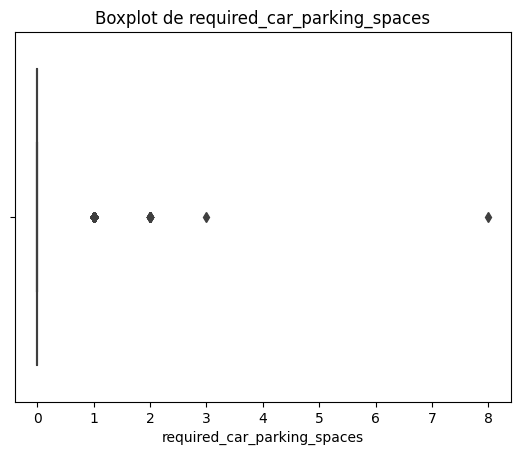

In [382]:
hacer_boxplot('required_car_parking_spaces')

In [383]:
analisis_boxplot('required_car_parking_spaces')

Moderados inferiores:  0
Moderados superiores:  3015
Severos inferiores:  0
Severos superiores:  3015


Observando el gráfico, podemos ver que hay casos superiores a 3.

In [384]:
df_superiores = df_hotel[df_hotel['required_car_parking_spaces'] > 3]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
8222,Resort Hotel,138,2017,March,19,2,2,2,0,0,HB,AUT,Direct,Corporate,True,0,2,E,F,1,No Deposit,not agent,not company,122,Transient-Party,80.0,8,0,False


In [385]:
eliminar(df_superiores)

Es un único caso que se aleja mucho del comportamiento del resto, por lo que procedemos a eliminarlo.

In [386]:
hacer_zscore('required_car_parking_spaces', 3, -3)

Z-score mayor que 3 :  3014
Z-score menor que -3 :  0


Existen muchos datos con z-score mayor que 3, por lo que aumentaremos a z-score mayor a 5.

In [387]:
df_superior = df_hotel_zscore[df_hotel_zscore['zscore_required_car_parking_spaces']>5]
print("Son iguales:",df_superior.shape[0] == df_superior[df_superior['is_canceled'] == 'False'].shape[0])

Son iguales: True


Podemos ver que todos los casos en los que z-score es mayor que 5 is_canceled es True, por lo que decidimos no modificar ni eliminar los datos, ya que nos parecen relevantes para nuestro analisis.

#### **Outliers de total_of_special_requests**
*Analisis mediante boxplot:*

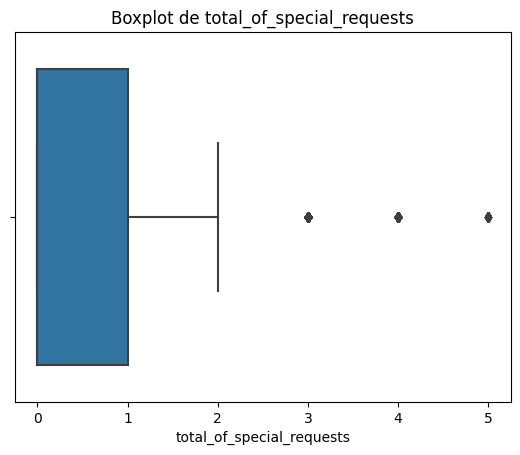

In [388]:
hacer_boxplot('total_of_special_requests')

In [389]:
analisis_boxplot('total_of_special_requests')

Moderados inferiores:  0
Moderados superiores:  1344
Severos inferiores:  0
Severos superiores:  165


Veamos los outliers severos pero con un umbral de 4.



In [390]:
df_superiores = df_hotel[df_hotel['total_of_special_requests'] > 4]
df_superiores

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
2305,Resort Hotel,76,2016,May,20,2,5,2,2,0,BB,GBR,Online TA,TA/TO,False,0,0,G,G,0,No Deposit,240.0,not company,0,Transient-Party,127.14,0,5,False
9721,Resort Hotel,24,2017,March,29,0,2,2,0,0,BB,BRA,Direct,TA/TO,True,0,4,D,D,0,No Deposit,250.0,not company,0,Group,63.00,0,5,False
11790,Resort Hotel,178,2017,August,14,1,5,2,1,0,HB,PRT,Direct,Direct,False,0,0,C,C,3,No Deposit,250.0,not company,0,Transient,262.50,0,5,False
17925,City Hotel,120,2017,April,17,1,4,2,0,0,SC,DEU,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Transient-Party,108.00,0,5,False
22574,City Hotel,219,2017,July,14,2,5,3,0,0,BB,NOR,Online TA,TA/TO,False,0,0,D,D,0,No Deposit,9.0,not company,0,Transient-Party,156.60,0,5,False
23713,City Hotel,46,2016,November,18,2,3,2,0,0,BB,BRA,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,7.0,not company,0,Transient,68.07,0,5,False
29673,City Hotel,51,2017,June,9,2,3,2,0,0,BB,PRT,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Transient,78.00,0,5,True
30748,City Hotel,207,2017,June,24,2,2,2,0,0,SC,USA,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Transient,99.00,0,5,False
31694,City Hotel,23,2016,November,11,1,2,2,0,0,BB,FRA,Online TA,TA/TO,False,0,0,D,D,0,No Deposit,9.0,not company,0,Transient,124.67,0,5,False
44544,City Hotel,125,2016,September,4,4,6,2,0,0,BB,ISR,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,7.0,not company,0,Transient,99.79,0,5,False


A pesar de ser outliers severos superiores, en vista de que hay un único caso en donde is_canceled es True, por lo que no modificaremos ni eliminaremos estos datos.

*Analisis mediante z-score:*

In [391]:
hacer_zscore('total_of_special_requests', 3, -3)

Z-score mayor que 3 :  1344
Z-score menor que -3 :  0


Filtremos los casos en donde z-score es mayor a 5.

In [392]:
df_superiores = df_hotel_zscore[df_hotel_zscore['zscore_total_of_special_requests']>5]
df_superiores.sample(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,zscore_lead_time,zscore_stays_in_weekend_nights,zscore_adults,zscore_children,zscore_previous_cancellations,zscore_previous_bookings_not_canceled,zscore_booking_changes,zscore_days_in_waiting_list,zscore_adr,zscore_required_car_parking_spaces,zscore_total_of_special_requests
48277,City Hotel,30,2015,October,14,0,3,2,0,0,BB,BEL,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,9.0,not company,0,Contract,96.30,0,5,False,-0.745074,-0.933219,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,-0.14201,-0.126222,-0.226204,5.781294
11790,Resort Hotel,178,2017,August,14,1,5,2,1,0,HB,PRT,Direct,Direct,False,0,0,C,C,3,No Deposit,250.0,not company,0,Transient,262.50,0,5,False,0.591377,0.075498,0.284054,2.228708,-0.115366,-0.080303,4.590109,-0.14201,3.420424,-0.226204,5.781294
31694,City Hotel,23,2016,November,11,1,2,2,0,0,BB,FRA,Online TA,TA/TO,False,0,0,D,D,0,No Deposit,9.0,not company,0,Transient,124.67,0,5,False,-0.808284,0.075498,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,-0.14201,0.479183,-0.226204,5.781294
29673,City Hotel,51,2017,June,9,2,3,2,0,0,BB,PRT,Direct,Direct,False,0,0,D,D,0,No Deposit,not agent,not company,0,Transient,78.00,0,5,True,-0.555442,1.084215,0.284054,-0.261721,-0.115366,-0.080303,-0.320762,-0.14201,-0.516737,-0.226204,5.781294
9721,Resort Hotel,24,2017,March,29,0,2,2,0,0,BB,BRA,Direct,TA/TO,True,0,4,D,D,0,No Deposit,250.0,not company,0,Group,63.00,0,5,False,-0.799254,-0.933219,0.284054,-0.261721,-0.115366,2.798505,-0.320762,-0.14201,-0.836831,-0.226204,5.781294


Por el mismo analisis de boxplot, no tocamos estos datos.

### **Relaciones Multivariadas**
Este analisis va a realizarse en la siguiente notebook.